In [1]:
from IPython.display import HTML
from IPython.display import display
from IPython.display import Image

HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()">
<input type="submit" value="Click to toggle on/off the raw code.">
</form>''')

In [2]:
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

# libraries for dimensionality reduction using sklearn
from sklearn.datasets import load_boston, fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF

# libraries for text processing using NLTK
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

# libraries for word cloud
from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

# libraries for ensuring clean codes
import warnings
warnings.filterwarnings('ignore')

# !pip install flake8 pycodestyle_magic
# %load_ext pycodestyle_magic
# %pycodestyle_on

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/msds2022/kcamacho/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/msds2022/kcamacho/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


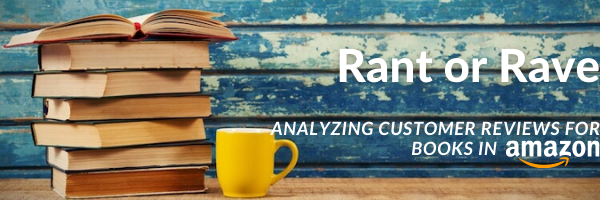

# Executive Summary

**Background**

E-commerce is booming especially today where almost everything can be sold on the internet. One of the most frequently sold items on the Internet are books. Almost three out of five European online shoppers purchase books [(Thiel, 2002)](#Thiel). Amazon.com, arguably the most outstanding company in the e-commerce business, is also in the bookselling business along with the other types of products that are being sold on its website. Amazon allows its customers to provide genuine feedback on their products, and this provides potential customers insights on the experiences of previous customers with the product. This is extremely important for online book sales because according to [Gorman (2004)](#Gorman), 
>*\"Sales increase with the number of 'stars' awarded by online reviewers. However, the decrease in sales associated with a negative customer book review is greater than the increase in sales generated by a positive review.\"*

**The report aims to shed light on the different themes that revolve around different customer ratings and reviews on books and e-books that are being sold in Amazon's website.** 


**Methods**

In this report, we used Amazon's customer review data of books and e-books sold in Amazon's website. This dataset was extracted from Jojie's repository of data. First, we preprocess the data by cleaning (removing null values, getting only words and ignoring numbers/ html tags, removing stopwords). We performed preliminary exploratory data analysis (EDA) through the use of word clouds and plots to see some descriptive statistics. We then vectorized the customer reviews of each book and e-book using the TF-IDF in order to get a matrix representation of the words found in the reviews for each book and e-book. Once vectorized, Non-Negative Matrix Factorization (NMF) was performed to be able to unearth the latent factors. The latent factors were visualized in bar plots to be able to interpret the topics that can be found for each star rating and for each type of rating (eg for Amazon Verified Purchases and for Amazon Vine reviews).

**Results**

The results show the power of text analysis through topic modelling using NMF. Genre was not part of the information in the database and yet some genres were uncovered such as `cookbooks`, `childrens books`, `religious books`, `books that were made into a movie/basis of a movie` and `books that were part of a series`. The results also shed light on what a 5-star rating actually means as compared to a 4-star rating, or how a 4-star rating differs from a 3-star rating. At the 5-star rating mark, most of the reviews were positive, such as `well-written`, `easy to understand`, `page turners` and `good condition for gifts`. At the 3-star mark we started to see some negative sentiment such as `disappointing` and `slow start`. At the 1-star mark there were more issues on the purchases such as `waste of money`, `deleted from Kindle` `wrong order` and `missing pages`. Meanwhile, there were no discernible differences between Verified Purchase Review, Vine reviews, books and ebooks. Most of the reviews in these categories were also able to unearth similar positive topics related to the `writing style` and `favorite author`, although some purchase-related topics also surfaced as `good condition` and `fast delivery`.

These results should be interesting for Amazon, its customers and its sellers (authors and book publishers). Looking at the average star rating is not enough. There is much context that can be gleaned by analyzing the text of the reviews and this should help in improving customer service or providing better products (books/ebooks) for customer readers.

**Recommendation**
This study is time-agnostic and only a portion of the data set was analyzed due to limitations in computing power and run time. An area for further study includes analyzing more data and looking at whether the topics changes over a period of time and whether genres have an impact on customer review topics and ratings. Moreover, clustering techniques can be used to group topics together and also explore different genres that can be uncovered within the data set. Further research on the consistency of the results considering reviews from different online selling platforms other than Amazon.com could also be explored.

# Introduction

E-commerce platforms have gradually grown into our daily lives over the last few decades. Online behemoths like Amazon and Alibaba are well-known these days for their fantastic deals and convenient shopping options.

Because of its convenience, e-commerce has become the favored method of conducting business nowadays. Customers may simply look through a comprehensive product database without having to leave the house, as opposed to physical storefronts [(Guevarra, 2021)](#Guevarra). There is a wealth of information available — including options, competitive prices, and customer testimonials. Customers who purchase online have almost all of the information they require to make a purchasing decision. They can even purchase straight away if they so desire. 

Shoppers, however, are concerned that their purchases will not live up to their expectations, or that their time and money will be wasted. This is a typical occurrence, especially when surfing e-commerce sites. Because shoppers cannot touch the product until it arrives at their door, they prefer to read customer reviews to gain vital insight into previous customers' experiences with the product they are considering purchasing.

The 'star' ratings are the most frequent approach for e-commerce platforms to allow customers to submit feedback. This is frequently accompanied with a written review, but this is not required. People share reviews for a number of reasons, but positive reviews confirm their inclination to spread the word about the product. It enables consumers to inform others that not only did they enjoy the goods, but so did 2,000 others. This also applies at the opposite end of the spectrum, when customers are unhappy with the goods. Unsatisfied consumers are more likely  to express their dissatisfaction through customer reviews.

According to [Truitt (2021)](#Truitt), 
>*\"For any company that exists in the digital space, online reviews are critically important when it comes to winning business and maintaining a positive reputation. In today’s web-based world, virtually everyone is reading online reviews. In fact, 91% of people read them and 84% trust them as much as they would a personal recommendation. The effects of reviews are measurable, too.\"*

Reviews have the power to make or break a company, but they usually work in its favor. In fact, publishing customer reviews can boost conversion rates by as much as 270 percent [(Galera, 2021)](#Galera). Understanding and leveraging consumer feedback can influence whether a business or a merchant succeeds or fails. 


Because customer reviews play such a huge influence in online product sales, it is in the merchant's best interest to understand the feedback that customers have on their items by looking at the themes of these reviews. Customers should spend time reading these reviews as well to assess whether or not a product is satisfactory.

## Amazon.com and its Book Selling History

Jeff Bezos gave himself a 30% probability of success when he established Amazon.com in 1994, which is somewhat better than the 1 in 10 odds for Internet start-ups. Sales had surpassed \\$1 billion by that point, but the company had yet to turn a profit. Some observers doubted Bezos' ability to carry out his ambition to sell everything and anything.

However, Amazon has dominated online retail two decades since it was established, with \\$136 billion in sales in 2016. It has also tackled cloud computing, technological devices, and the entertainment industry. At a period when bookstore chains like Barnes & Noble, Waldenbooks, and Crown Books were commonplace in American shopping malls, Amazon.com debuted its online bookselling site. Amazon, dubbed "Earth's Biggest Bookstore," launched in July 1995, relying on big book distributors and wholesalers to rapidly fill orders. Because it was not constrained by the physical limits of a brick-and-mortar store, Amazon quickly grew to carry more than 2.5 million titles by 1997, with sales totaling \\$148 million. There were 1.5 million consumers in more than 150 countries when the company was founded [(Easter & Dave, 2017)](#ED). The company went public on May 15, 1997, with a market capitalization of \\$438 million dollars and a stock price of \\$18 per share. Today, Amazon boasts a market capitalization of \\$1.67 trillion and a share price of \\$3,306.


## Amazon Reviews

Customer reviews are an important component of the online purchase experience. Customer reviews can help potential buyers decide whether it is the right product for them. Amazon encourages customer reviews and has adopted a 5-star rating system, with 5 being the highest. Aside from ranking the product iwth a star rating, customers can also put descriptive comments on why they have rated such. In terms of the types of review, Amazon tags an "Amazon Verified Purchase", which means that they have verified that the person writing the review bought the product at Amazon and didn't receive the product at a deep discount. Another review type is "Amazon Vine", an invitation only program where the trusted reviewers are given products provided by publishers and are encouraged to post honest and useful feedback [(Amazon.com, n.d.)](#Amazon).

Customer reviews are an important part of the customer journey. In the customer exploration phase, the customer learns about the product, its features and benefits, and another dimension that helps are the reviews of other people who have purchased the product. Studies have shown that there is a positive relationship between social influence (e.g., influence of online reviews) and impulse buying [(Zhang, Xu and Zhao, 2018)](#Zhang). Online reviews have been shown to be a source of powerful interpersonal influence in consumer decision making. In the study of 315 online shoppers in major Chinese websites, these shoppers were more likely to focus on online reviews and were more likely to develop the urge to buy impulsively. The study also posited that consumers prefer to browse online reviews than marketer-generated content since these are perceived to be more credible and more relevant.


## Topic Modelling on Online Customer Reviews

Marketers have known long before that customer experience is the key to a successful business. A positive customer experience encourages customers to return for more. Agency Insight was able to find that more than  85% of customers purchase more after a positive experience, while 25% drop a product or a brand with just one negative experience. Since online retail has been the more dominant channel at which customers make and fulfill their purchase decisions, gathering feedback from customers promote a new avenue for the business to understand what drives a positive customer experience. But what does the customer feedback actually mean? Do the star ratings really tell enough about the feelings of the reviewer? While star ratings make it easy for readers and the company to discern the scale of satisfaction/dissatisfaction, content can be a deep well from which we can generate more insights [(Sutherland et al., 2020)](#Sutherland). 

To unearth the hidden topics, topic modelling will be used. The goal of topic modeling in this study is to find a topic or theme across reviews and discover any hidden topics that can be used by the business in generating more insight about customer preferences.

## Significance

By using Topic Modelling techniques on Amazon's customer reviews, topics or themes can be found across different types of customer reviews. There is more information that could be revealed on what it means to have a 5-star rating vs a 4-star rating, or a 2-star rating vs a 3-star rating. Having an additional dimension at which to analyze customer satisfaction can benefit authors/publishers who write, publish and selling the books. Authors can  gain insight that could help them improve their future novels or written pieces. Meanwhile, customers can discern the difference between the star ratings without having to sift thourgh thousands of reviews just to get a sentiment of the product. This can help customers finalize their decision on whether they will buy the book/ebook or not. This study can also benefit Amazon in terms of finding out if their review system works or if there is room for improvement. Amazon, as an online platform, is interested in giving a good customer experience and part othat experience is the availability of accurate reviews.

This study can also be extended to other online reviews for different products in the future. Discerning the hidden topics in product reviews can lead to better design of products and services and can better serve customers and their needs and wants in the long run.

## Research Questions
<br>

Given the importance of customer reviews in e-commerce websites, the study aims to examine the different themes and hidden topics from customer reviews in Amazon to extract valuable patterns and insights that may help Amazon, its merchants, and its customers in future decision making. Thus, the main research question is formally stated as: 

<div style="text-align: center"><font size="4" face = "Verdana"><i>"What are the different topics or themes across different star ratings <br>for books and e-books on Amazon's website?"</i></font>
</div>


### Supporting Questions 

Other questions that the study would like to answer are the following:

 1. Which type of star ratings/reviews get upvoted as helpful votes?
 2. Is the length of the review dependent on the star rating?
 3. Are the topics consistent across different star ratings?
 4. What are the most frequently occuring words in the customer reviews across different rating types (i.e., Verified Purchase reviews, Vine reviews, ebook reviews and book reviews)?

## Scope and Limitations

The study is only within the following scope and limitations stated below:

1. **Data Limitations** 
- The customer review data used for analysis is limited to the data that are available in Jojie.
- The customer review data selected was limited to certain dates.
- Only 26,000 rows of data are analyzed to optimize computational and time resources.

2. **Product Category Limitation**
- Although the available data contains customer reviews of different product categories, the study only examines customer reviews of book and e-book products.
- The dataset does not contain information on the book genres.

3. **Topic Modelling Limitation**
- The only topic modelling technique used in this study is Non-negative Matrix Factorization (NMF).
- Since topic interpretation is subjective, the resulting topics from NMF are labelled subjectively by the researchers.

# Methodology

A total of 26,000 customer reviews were retrieved from Jojie's repository. The general workflow for uncovering the underlying themes in Amazon book reviews are shown in Figure 1. This involves the following steps:

1. Load the data
2. Preprocess the data
3. Perform Exploratory Data Analysis (EDA)
4. Extract Features using TFIDF
5. Reduce Dimensionality using NMF
6. Analyze Results and Make Recommendations

<div style='text-align: center'><b>Figure 1:  Workflow for extracting features for Amazon Book Reviews</b></div>
<img src='fig1.png'></img>

## Load the data

We loaded the Amazon reviews files for US books and US Digital Ebooks purchases. This consists of 5 files, and only the first few rows of each file were considered in the dataframe. The number of rows that were read is dependent on 1) the size of the file (e.g. `file1` only contains 3,500 files) and 2) balancing the dataset to contain reviews for books and ebooks. Since there are 3 files for book reviews, the remaining balance to make up 13,000 files were split evenly between `file2` and `file3`. Meanwhile, the 13,000 sampes was split evently between `file4` and `file5`. 

The five files were combined in one single dataframe, `df`, for ease of analysis. Only the important feature columns were kept - these were those relating to the star ratings, type of review (verified and vine), the review title and the review body. The final dataframe `df` consisted 26,000 rows and 9 columns. The sample dataframe is shown below.

**Table 1. Head of the consolidated dataframe of Amazon Book Reviews**

In [4]:
# Download files from jojie
base = '/mnt/data/public/amazon-reviews/'
file = 'amazon_reviews_us_Books_v1_00.tsv.gz'
file2 = 'amazon_reviews_us_Books_v1_01.tsv.gz'
file3 = 'amazon_reviews_us_Books_v1_02.tsv.gz'
file4 = 'amazon_reviews_us_Digital_Ebook_Purchase_v1_00.tsv.gz'
file5 = 'amazon_reviews_us_Digital_Ebook_Purchase_v1_01.tsv.gz'

df1 = pd.read_csv(base+file, nrows=3500, delimiter='\t')
df2 = pd.read_csv(base+file2, nrows=4750, delimiter='\t')
df3 = pd.read_csv(base+file3, nrows=4750, delimiter='\t')
df4 = pd.read_csv(base+file4, nrows=6500, delimiter='\t')
df5 = pd.read_csv(base+file5, nrows=6500, delimiter='\t')

# Merge all the dataframes together, keep only the useful columns
df = pd.concat([df1, df2, df3, df4, df5])
df = df[['product_title', 'product_category', 'star_rating',
         'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
         'review_headline', 'review_body']]
df = df.reset_index(drop=True)
df.head(3)

product_title product_category  star_rating  \
0  There Was an Old Lady Who Swallowed a Shell!            Books            5   
1                                I Saw a Friend            Books            5   
2                          Black Lagoon, Vol. 6            Books            5   

   helpful_votes  total_votes vine verified_purchase  \
0              0            0    N                 Y   
1              0            0    N                 Y   
2              0            0    N                 Y   

                                     review_headline  \
0                                         Five Stars   
1  Please buy "I Saw a Friend"! Your children wil...   
2                                      Shipped fast.   

                                         review_body  
0                 I love it and so does my students!  
1  My wife and I ordered 2 books and gave them as...  
2  Great book just like all the others in the ser...

**Table 2: Sample book review**

In [5]:
pd.set_option('display.max_colwidth', 150)
df['review_body'].to_frame().head(5)

review_body
0                                                                                                                     I love it and so does my students!
1  My wife and I ordered 2 books and gave them as presents...one to a friend's daughter and the other to our grandson! Both children were so happy wi...
2                                                                                                     Great book just like all the others in the series.
3                                                                                                                                           So beautiful
4                                                                 Enjoyed the author's story and his quilts are incredible.  I have plans to make three.

## Data description

The 26,000 rows of data represents a sample of customer book reviews from selected slices of dates. For book reviews, the dates covered were 2015-08-31, 2012-05-01 to 03, 2012-05-01 to 02, 2005-10-11 to 14. The date covered for ebook reviews were 2015-08-31, 2013-09-08 to 09. It may be noted that this study is not concerned with the time dimension and we take the reviews the same regardless of the time period. The reviews is split evenly between ebooks and books to have a balanced dataset that we hoped could also be a basis for a balanced analysis when we look at the difference between ebook reviews and book reviews. It may be noted that the methodology presented is robust enough to be applied to any length of dataset and any time period. 

The following table shows the columns and features of interest in the dataframe.

**Table 3: Data type and description** 

| Column Title      | Type    | Description                                                        |
|-------------------|---------|--------------------------------------------------------------------|
| product_title     | string  | Title of the book                                                  |
| product_category  | string  | Book or digital book (ebook)                                       |
| star_rating       | integer | Rating score from 1 to 5 (5 is highest)                            |
| helpful_votes     | integer | Count of times the review was tagged as 'helpful' by other viewers |
| total_votes       | integer | Total number of times the review was liked by other users          |
| \*verified_purchase | string  | 'Y' if purchase is an Amazon Verified Purchase, 'N' otherwise       |
| review_headline   | string  | Title of the review                                                |
| review_body       | string  | Text/body of the review                                            |


<font size=1>\* An "Amazon Verified Purchase" review means Amazon has verified that the person writing the review purchased the product at Amazon and didn't receive the product at a deep discount.</font>

The following summary shows some summary statistics for the star ratings, helpful votes and total votes

**Table 4: Rating Summary Statistics**

In [6]:
df.describe().loc[['mean', 'std', 'min', 'max']]

star_rating  helpful_votes  total_votes
mean     4.320538       3.049038     4.323577
std      1.100906      17.646154    20.848532
min      1.000000       0.000000     0.000000
max      5.000000    1186.000000  1283.000000

## Data Pre-Processing

As can be seen from the sample review in Table 2, there are numbers and symbols that are not useful for identifying the latent factors (topics) in the text corpus (`review_body`). The review body was cleaned and tokenized by identifying only the words and ignoring numbers, putting all words in lowercase, removing the stopwords, stemming and then lemmatizing the data. Stemming is the process of getting the root word by 'chopping' off letters from a word until a stem is reached (for example, 'beautiful' becomes 'beauti'). Meanwhile, lemmatization is the process wherein word reduction considers the vocabulary, which is useful in the English language where root words can be quite complex (for example, 'mice' is 'mouse') [(Beri, 2020)](#Beri). WordNetLemmatizer was used instead of PorterStemmer because the latter resulted in tokens that were not actually words.

It may be noted that we added some Amazon-specific stopwords such as `book`, `books`, `going`, `read` and `reading` as during the initial runs, these words tended to show up and did not add much value in discerning the topics. The succeeding runs of the model when these stopwords were removed improved the words that were grouped to form a topic.

The corpus was preprocessed to generate the tokens (words that will be analyzed) in the next step. The following shows the example of the tokenized words in the `review_body`.

In [7]:
def preprocess_data(corpus):
    """Clean the document list by tokenizing, removing stop words and
    stemming.

    PARAMETERS
    =========
    corpus: pandas dataframe typecasted as string of the corpus

    RETURNS
    =======
    texts: list of processed text

    REFERENCE:
    ==========
    Code inspired by Datacamp.
    """
    # initialize regex tokenizer to get only words and ignore numbers
    tokenizer = RegexpTokenizer(r'\b[A-Za-z]+\b')

    # create English stop words list
    amazon_stop = ["book", "books", "review", "going", "read", "reading"]
    new_stopwords = stopwords.words('english') + amazon_stop
    en_stop = set(new_stopwords)

    # Create wnl of class WordNetLemmatizer
    wnl = WordNetLemmatizer()

    # keep a list for tokenized documents in loop
    texts = []

    # loop through document list
    for i in corpus:
        # clean and tokenize document string, remove less than 3 letters
        raw = re.sub(r'\b\w{1,3}\b', '', i).lower()
        tokens = tokenizer.tokenize(raw)

        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if i not in en_stop]

        # stem tokens using wordnetlemmatizer
        stemmed_tokens = [wnl.lemmatize(i) for i in stopped_tokens]

        # add tokens to list
        texts.append(stemmed_tokens)
    return texts


# clean and tokenize the data using the preprocess_data function
df['docs'] = preprocess_data(df['review_body'].astype(str))

# convert docs from list to string
df['docs'] = [','.join(i) if isinstance(i, list) else i for i in df['docs']]

In [8]:
# make parse_dfs per star rating using the processed data
df_5star = df[df['star_rating'] == 5]
df_4star = df[df['star_rating'] == 4]
df_3star = df[df['star_rating'] == 3]
df_2star = df[df['star_rating'] == 2]
df_1star = df[df['star_rating'] == 1]
df_not5 = df[df['star_rating'] != 5]

# make parse_dfs for vine reviews using the processed data
df_vine = df[df['vine'] == 'Y']

# make parse_dfs for verified purchases using the processed data
df_verified = df[df['verified_purchase'] == 'Y']

# make parse_dfs for book type using the processed data
df_books = df[df['product_category'] == 'Books']
df_ebooks = df[df['product_category'] != 'Books']

# display using the processed data
df['docs'].to_frame().head(5)

docs
0                                                                                                                                           love,student
1  wife,ordered,gave,present,friend,daughter,grandson,child,happy,story,author,katrina,streza,overjoyed,absolutely,adorable,artwork,artist,michele,ka...
2                                                                                                                               great,like,others,series
3                                                                                                                                              beautiful
4                                                                                                  enjoyed,author,story,quilt,incredible,plan,make,three

## Exploratory Data Analysis (EDA)

We further cleaned the data before doing the exploratory data analysis. We checked for null values and removed the null values in the review body. There was only one blank review so this deletion did not compromise the quality of the data set. 

In [9]:
# Check for null values
df.isna().sum()

product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      1
review_body          1
docs                 0
dtype: int64

In [10]:
# inspect the null value for review body
df[df['review_body'].isna()]

product_title product_category  \
992  The Boleyn King: A Novel (The Boleyn Trilogy)            Books   

     star_rating  helpful_votes  total_votes vine verified_purchase  \
992            5              2            2    N                 Y   

    review_headline review_body docs  
992      Five Stars         NaN

In [11]:
# dropping row with null value for review_body
df.drop(992, axis=0, inplace=True)

In [12]:
# no more NaN review_body
df[df['review_body'].isna()]

Empty DataFrame
Columns: [product_title, product_category, star_rating, helpful_votes, total_votes, vine, verified_purchase, review_headline, review_body, docs]
Index: []

### Word Cloud Representations

Word clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud. A word cloud is a collection, or cluster, of words depicted in different sizes [(Boost Labs, 2020)](#Boost). 

The larger and bolder the word, the more frequently it appears in a document and the more essential it is. These are ideal techniques to extract the most relevant sections of textual data, from blog posts to databases, and are also known as tag clouds or text clouds. They can also assist business users in comparing and contrasting two separate pieces of text in order to identify phrasing similarities.

We use the word cloud representations of the reviews from our data. By filtering out the important words using the `stopwords` function from the module `nltk`, we can then proceed building our word cloud representations of these reviews. It may be noted that in this portion we only looked at the frequency of the words in this section. 

In [13]:
# defining function to build word cloud
def w_cloud(df, num, title, show=True):
    """Plots Wordcloud
    
    PARAMETERS
    ==========
    df: pandas.DataFrame
        input dataframe containing data
    num: int or str
        A unique identifier for the figure.
        
    title: str
        figure title
    
    show: bool
        shows the figure if True; does not show the figure if False
    """
    split_docs = df['docs'].str.split(',').apply(lambda x: ' '.join(x))
    compiled = ''
    for rev in split_docs:
        compiled = compiled + rev + ' '
    wc = WordCloud(background_color='white',
                   stopwords=['would', 'really'],
                   colormap='tab10').generate(compiled)
    plt.figure(num, figsize=(12, 8))
    plt.imshow(wc)
    plt.axis('off')
    plt.title(title, fontdict={'fontsize': 15}, pad=1.5)

    if not show:
        plt.close(num)
    else:
        plt.show()

In [14]:
# manually including the word 'not' in the 'docs' column if the review body
# contains the word 'not'
# this is done because 'not' is filtered off by the stopwords
# we want 'not' to show in the word cloud
ind = df[df.review_body.str.contains('not')].index
df.loc[ind, 'docs'] = df.loc[ind, 'docs'].apply(lambda x: x + ',not')

#### Word Cloud for All Star Ratings

Figure 2 below shows the collection of words from the reviews of all star ratings. Top words, as expected, are all related to the attributes of book and ebooks. Words such as `story`, `life`, `character`, and `author` are some of the top ones to come up in all reviews. 

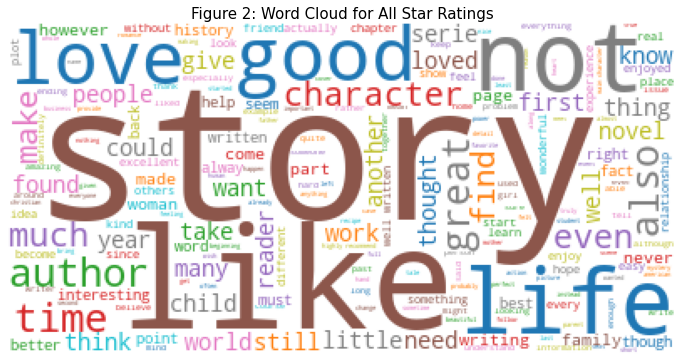

In [15]:
w_cloud(df, 'all_wc', 'Figure 2: Word Cloud for All Star Ratings')

#### Word Cloud for 5-Star Ratings

For 5-star ratings, figure 3 shows that the words are more positive and are still focused on words attributing to a good book. The most evident words are `story`, `life`, `love`, `great`, `like`, and `character`. Most of these words are positive adjectives, rightfully so given it is for 5-star ratings. Five-star reviews are most likely about the story of the book, or how a book is relatable to life and love. 

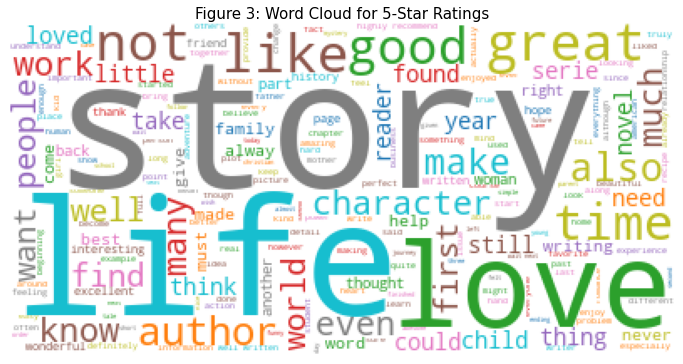

In [16]:
w_cloud(df[df['star_rating'] == 5],
        '5_wc',
        'Figure 3: Word Cloud for 5-Star Ratings')

#### Word Cloud for 1-Star Ratings
For 1-star ratings, the more evident words are `author`, `not`, `like`, `could`, `even`, `time`, and `story`. Compared to figure 3, the word `not` is included in the top words as expected for 1-star reviews. Although positive words such as `like`, and `good` are also of significant size in the word cloud, the signficance of the words `not` and `could` may imply that these positive words are reversed. One-star ratings are generally criticisms about the author and story. 


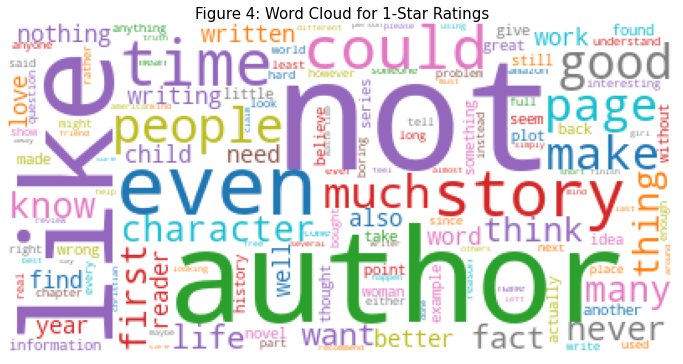

In [17]:
w_cloud(df[df['star_rating'] == 1],
        '1_wc',
        'Figure 4: Word Cloud for 1-Star Ratings')

### Effect of Verified Purchases on Customer Star Ratings

Verified purchase reviews are reviews from Amazon-verified reviewers. These reviewers are people who have purchased the product at Amazon and did not receive the product at a deep discount. These reviews are perceived to be more credible than non-verified reviews. Figure 5 shows the proportion of verified and non-verified reviews for books and e-books. It appears e-books have almost 5 times more verified purchases compared to its non-verified purchases. However, books have an almost equal proportion of verified and non verified purchases with non-verified purchases having a bit more over verified ones. Given these numbers, are shoppers generally more satisfied with books/ebooks coming from verified purchases? 

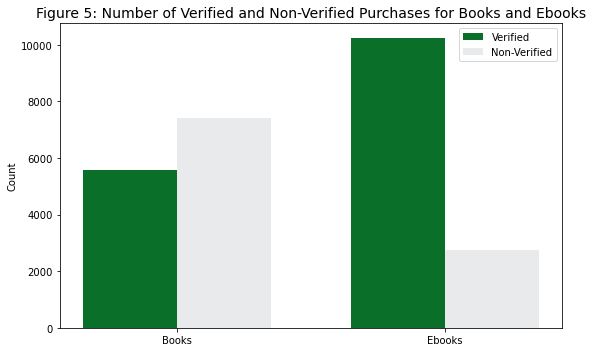

In [18]:
labels = ['Books', 'Ebooks']
V = [(df[(df.product_category == 'Books')]
      .groupby('verified_purchase')['vine'].count()['Y']),
     (df[(df.product_category == 'Digital_Ebook_Purchase')]
      .groupby('verified_purchase')['vine'].count()['Y'])]
NV = [(df[(df.product_category == 'Books')]
       .groupby('verified_purchase')['vine'].count()['N']),
      (df[(df.product_category == 'Digital_Ebook_Purchase')]
       .groupby('verified_purchase')['vine'].count()['N'])]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x - width/2,
                V,
                width,
                label='Verified',
                color=['#0A7029'])
rects2 = ax.bar(x + width/2,
                NV,
                width,
                label='Non-Verified',
                color=['#E9EAEC'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Figure 5: Number of Verified and Non-Verified Purchases '
             'for Books and Ebooks', fontdict={'fontsize': 14})
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()
plt.show()

In [19]:
# defining function for donut plot
def donut_stars(df, num, title, show=True):
    """Plots a donut chart for star rating proportions"

    PARAMETERS
    ==========
    df: pandas.DataFrame
        input dataframe containing data
    num: int or str
        A unique identifier for the figure.
        
    title: str
        figure title
    
    show: bool
        shows the figure if True; does not show the figure if False
    """
    label = [1, 2, 3, 4, 5]
    val = df.groupby('star_rating')['product_title'].count().to_list()
    # append data and assign color
    colors = ['#333652', '#E9EAEC', '#90ADC6', '#0A7029', '#FAD02C']
    # plot
    fig = plt.figure(figsize=(8, 6), dpi=100, num=num)
    ax = fig.add_subplot(1, 1, 1)
    ax.pie(val, colors=colors, labels=None, autopct='%.2f%%', pctdistance=0.8)
    ax.add_artist(plt.Circle((0, 0), 0.6, color='white'))
    plt.title(title, fontdict={'fontsize': 14})
    plt.legend(labels=label)
    if show:
        plt.show()
    elif show == False:
        plt.close(num)

Figures 6 and 7 show the proportions of each star rating for books and ebooks, respectively. It can be seen in both figures that the proportions are consistent for both types of books. Note, however, that the proportions of verified reviews and non-verified reviews are different on both types. Since books have more non-verified reviews, it is more probable for books to have biased reviews. Meanwhile ebooks have a lot more verified verified reviews and the expectation is more reviews would be more critical and unbiased. However, this is not the case because it can be seen in figures 6 and 7 that there is no apparent effect from the disparities in verified review proportions on the star ratings. With this, we can infer that the **type of review (i.e. if it is verified purchase or not), does not have an effect on the ratings of customers as they are still consistent on both types of books.**

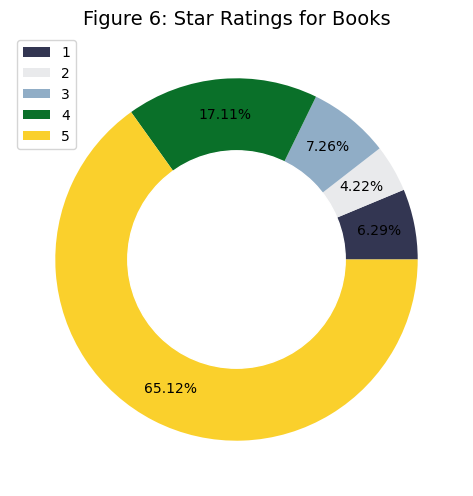

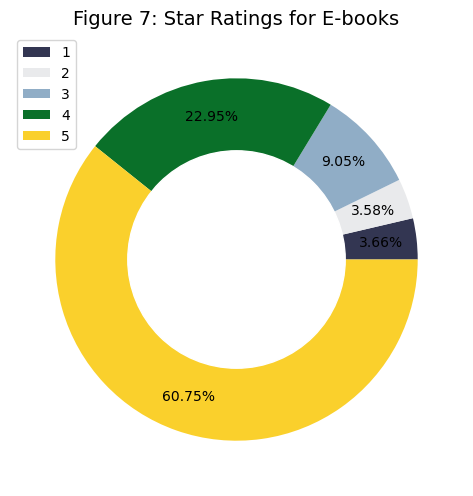

In [20]:
donut_stars(df[df.product_category == 'Books'],
            'semidonutbooks',
            'Figure 6: Star Ratings for Books')
donut_stars(df[df.product_category == 'Digital_Ebook_Purchase'],
            'semidonutebooks',
            'Figure 7: Star Ratings for E-books')

<a id='helpful'></a>
### Helpful Votes Across Different Star Ratings

Customers browsing products on Amazon's website can upvote a review if they deem it very helpful for them in terms of their decision on buying a certain product, or when they have already bought the product and have the same sentiments of the reviewer regarding the product listed. Figure 8 below shows the average number of times a review has been upvoted as 'helpful' for each star rating. It can be seen in the figure below that **the most number of reviews upvoted as 'helpful', on average, are the reviews that had a 1-star rating.** The trend is that the lower a review's star-rating is, the more likely it is to be upvoted as 'helpful', on average. It appears that customers are more likely to upvote a low star rating review because it contains critical information that will most likely prevent other customers from having the same negative experience sa the reviewer's. Moreover, if a customer has had a similar negative experience, he/she would tend to upvote the review to indicate that the reviewer is not the sole customer to have had that experience. To support this, [Truitt (2021)](#Truitt) states that a study found that 82% of those who read online reviews specifically seek out negative reviews.  On the other hand, customers who are viewing a product's review would usually see a lot of positive reviews already, which is why 5-star ratings or even 4-star ratings would not have a huge upvote count. This makes low star ratings rare and even more valuable to a customer compared to high star ratings. 

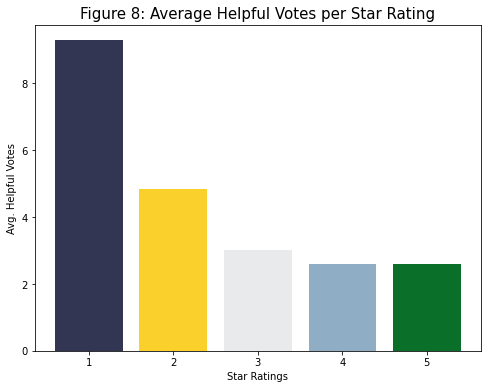

In [21]:
colors = ['#333652', '#FAD02C', '#E9EAEC', '#90ADC6', '#0A7029']
plt.figure(figsize=(8, 6))
plt.bar(df.groupby('star_rating')['helpful_votes'].mean().index,
        df.groupby('star_rating')['helpful_votes'].mean(), color=colors)
plt.title('Figure 8: Average Helpful Votes per Star Rating',
          fontdict={'fontsize': 15})
plt.xlabel('Star Ratings')
plt.ylabel('Avg. Helpful Votes')
plt.show()

<a id='length'></a>
<h3> Length of Review Across Different Star Ratings</h3>

The length of a review is defined as the number of words present in the review body. Figure 9 below uses that definition of length to show the differenes of review length for each star rating. The resuling bar plot indicates that **2-star, 3-star, and 4-star ratings have relatively lengthier reviews compared to 1-star and 5-star reviews**. Customers who rate books/ebooks on a 2 to 4 star rating tend to express both the good and bad aspects of the book/e-book which is why the reviews are lengthier compared to customers who rate book/ebooks on the extremes of the scale (1-star and 5-star). 

An example of this phenomenon is a review from a 3-star rating. The book she is critiquing is titled *The Concepts and Practice of Mathematical Finance (Mathematics, Finance and Risk)*
>*\"If you already know almost everything it is a very good book. No error and the guy knows what he is doing. However, if you know everything, why do you want to buy this book? Unfortunately, if you do not know everything, the book is very difficult to understand. At a first lecture I never get the point. After reading some others books and implement the problem, I can indeed understand the chapter... but what is the use? Maybe we (the author and me) do not have the same way of thinking... Another bad point is that there is no implementation. So if you are blocked somewhere you are dead. Moreover the authors spend 16 chapter of 18 on equities and 2 on interest rate. But this last field correspond to 90% of the market! ... Well,..., However,... not so bad ... so, 3 stars"*

A sample 5-star rating is shown below. The book is titled as *To Kill a Mockingbird (Harperperennial Modern Classics)*
>*\"My favorite book of all times, so many universal themes in such a live picture of the US Southern society in the 30s. All that plotted within the mesmerized and mesmerizing perspective of a first-grade child. Pure genius, and unforgettable characters"*

A sample 1-star rating is shown below. The ebook is titled as *The Einstein Prophecy*
>*\"extremely stupid book. By skipping sentences and some times pages able to finish book. Such a vesting of my time. I been cone by the book tittle this is only good things about .please don't touch even with flag pole."*

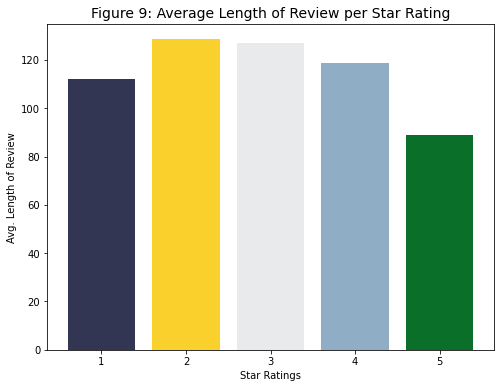

In [22]:
df2 = df.copy()
df2['rev_length'] = df2.review_body.apply(lambda x: len(x.split()))

colors = ['#333652', '#FAD02C', '#E9EAEC', '#90ADC6', '#0A7029']
plt.figure(figsize=(8, 6))
plt.bar(df2.groupby('star_rating')['rev_length'].mean().index,
        df2.groupby('star_rating')['rev_length'].mean(), color=colors)
plt.title('Figure 9: Average Length of Review per Star Rating',
          fontdict={'fontsize': 14})
plt.xlabel('Star Ratings')
plt.ylabel('Avg. Length of Review')
plt.show()

## Topic Modelling

The function for topic modelling combines the feature extraction using `Term Frequency - Inverse Document Frequency (TFIDF`) and dimensionality reduction and matrix decomposition using `Non-Negative Matrix Factorization (NMF)` to find the latent factors (topics). While the frequency of the words are able to give us a preliminary picture of the reviews, we turn to analyzing hidden (latent) factors to see if there are hidden themes or topics that can be unearthed using TFIDF and NMF. These concepts are discussed in detail below.

### Feature Extraction

Features were extracted from the review body using term frequency-inverse document frequency (TF-IDF). This measures the frequency and importance of the words in the review body. This was implemented using sklearn's `TFIDFvectorizer`. Table 5 shows the parameter settings that were considered in the `TFIDF vectorizer`.

**Table 5: Hyperpamater settings for the TF-IDF Vectorizer**

| Parameter | Description | Value |
| --------- | ----------- | ----- |
| `min_df`  | Ignore terms that have a document frequency strictly lower than the given threshold            | 0.001 |
| `max_df`  | Ignore terms that have a document frequency strictly higher than the given threshold            | 0.95 |
| `ngram_range`  | The lower and upper boundary of the range of n-values for different n-grams to be extracted. All values of n such that $min_n <= n <= max_n$ will be used            | (1,2) |

The `TFIDFVectorizer` removes frequent words and rare words through the use of stopwords. Stopwords are words that appear too frequently in the English language but do not necessarily impart more insight (e.g., prepositions such as the, a, an, and, or). Words that appear in more than 95% of the titles, were also ignored by setting the `max_df` parameter of `TFIDFVectorizer` to `max_df = 0.95`. Rare words, or words that appeared in less than 0.1% of the review body, were also excluded from the corpus. This was implemented by setting the `min_df` parameter of the `TFIDFVectorizer` to `min_df = 0.001`. These settings were arrived at through iteration, wherein topics were most discernible at a range of min_df between 0.01% and 2%. Run times also increased the lower the min_df, so this was also a parameter that was tweaked to balance the runtimes and the results. 

Unigrams, bigrams, and trigrams were extracted as part of the vocabulary by setting the `ngram_range` parameter of the `TFIDFfVectorizer` to `ngram_range = (1,2)`. This range of n-grams was chosen to preserve most currently occuring descriptive words (such as 'really + great, 'great' + 'story') to help in definining the topics. The setting of $n=2$ was also based on trial and error on which would give the most discernible topics. 

There are 5,049 unique items after vectorizing.

### Dimensionality Reduction

The resulting matrix of the vectorized text has a size of (26,000 x 5,049) which is cumbersome and large to analyze. Hence, this matrix was decomposed into weights and latent factors using **Non-Negative Matrix Factorization (NMF)**. NMF was selected as the dimensionality reduction technique because one of the pitfalls of using truncated Singular Value Decomposition (SVD) is that this results in negative components, which is not natural for interpreting text [(Peter, Gopakumar, et. al)](#Gopakumar). 

Decomposition of the TDIDF matrix was implemented using sklearn's `NMF` model. It may be noted that choosing `n_components` and the number of words per topic depends on the user, but we used the reconstruction error based on the Frobenius Norm to see what is the minimum no of topics that will give the least reconstruction error. Figure 2 shows the plot of the reconstruction error vs `n_components` for a 1 star rating. This was done across all star ratings and all types of reviews (e.g. verified purchase vs non-verified purchase, vine vs non-vine, book vs ebook). Table 6 shows the summary of the results.

In [23]:
def optimal_k(parse_df, n_features, n_components, step_size, title):
    """Plots the reconstruction error to help choose n_components

    PARAMETERS
    ==========
    parse_df    : the pandas dataframe column that contains the text
                  data to be analysed
    n_features  : integer, max no of features in the nmf model.
                  If None, it will consider the total number of features.
    n_components: integer, no of components we want to check
    step_size   : integer, no of steps to divide n_components
    title       : string, to append to 'Optimal n_components for ____'

    RETURNS
    =======
    Plot of the reconstruction error (y-axis) vs the no of
    components (x-axis)
    """

    rec_err = []
    for k in np.linspace(1, n_components, step_size):

        # Use tf-idf features for NMF.
        tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=0.02,
                                           max_features=n_features,
                                           stop_words='english',
                                           ngram_range=(1, 2))
        tfidf = tfidf_vectorizer.fit_transform(parse_df)

        # Fit the NMF model
        nmf = NMF(n_components=int(k), random_state=1).fit(tfidf)

        # Compute the reconstruction error
        err = nmf.reconstruction_err_
        rec_err.append(err)

    # Determine the minimum reconstruction error
    min_err_index = rec_err.index(min(rec_err))
    pos = np.linspace(1, n_components, step_size)
    optimal_k = pos[min_err_index]

    # Plot the reconstruction error curve
    plt.plot(np.linspace(1, n_components, step_size), rec_err)
    plt.title(f'Figure 10: Optimal n_components for {title}',
              fontdict={'fontsize': 14})
    plt.ylabel('Reconstruction Error')
    plt.xlabel('n_components\n')
    print(f"Min rec_err: {min(rec_err)} at k: {int(optimal_k)}", "\n")
    return plt.show()

Min rec_err: 0.08760067193718374 at k: 600 



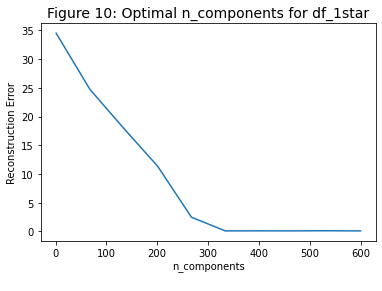

In [24]:
optimal_k(df_1star['docs'], n_features=None, n_components=600,
          step_size=10, title='df_1star')

The following table summarizes the number of components that will give the lowest reconstruction error.

**Table 6: Summary of Reconstruction Error vs No of Topics**

| Rating   type    | Reconstruction Error | No of components/topics |
|------------------|----------------------|-------------------------|
| 1 star reviews   |        0.087600672   | 600                     |
| 2 star reviews   |        0.112047556   | 533                     |
| 3 star reviews   |        0.108424784   | 134                     |
| 4 star reviews   |        0.144294008   | 134                     |
| 5 star reviews   |        0.29813538    | 125                     |
| Verified reviews |        0.041328601   | 450                     |
| Vine reviews     |        0.000732305   |        533              |
| Book reviews     |        0.039609391   | 400                     |
| Ebook reviews    |        0.182971634   | 200                     |
| All reviews      |        0.200237451   | 267                     |

## Unearthing hidden topics

The number of topics that should be explored based on the minimum reconstruction error are still quite large (as given by Table 6), so to help in visualizing the most occuring tokens, a word cloud was utilized using the number of components that has the least reconstruction error. This serves as an additional step to make sense of the words that make up the topics. The bigger words are the tokens that occur more frequently, but does not denote a big weight. In making the wordcloud, the number of components that will give the least reconstruction error was considered, and 30 words were considered per topic. We could afford to have a bigger setting of topics and topwords in making the TFIDF wordclouds because we are interested in the overall number of words that show up in the vectorized tokens, but we do not make any final inferences regarding the topics using this. 

The formal analysis of the topics is done on the latent factors derived using NMF. A graph of the words of 40 latent factors were graphed and analyzed to discern any topics arising from each star rating and each type of rating. Only 40 factors were graphed as beyond 40, the topics and words becomes repetitive and no new topics could be formed. Also, 10 words were displayed in the NMF latent factor graphs as this seemed to form the most coherent topics. It may be noted that a random_state of 1 was also used to ensure the same results across different runs. 


In [25]:
def plot_nmf(model, feature_names, n_components, n_top_words, title):
    """Return the plot of the topics unearthed through TFIDF and NMF

    PARAMETERS
    ----------
    model        :  dimensionality reduction model
    feature_names:  list of the feature names from TDIDF model
    n_components :  interger or None, no of topics
    n_top_words  :  integer, number of words to be returned per topic
    title        :  string, title of the plot

    RETURNS
    -------
    Plot of the topics, words per topic and the latent factors per topic

    REFERENCES
    ----------
    Code inspired by sklearn's documentation on NMF and Topic Modelling
    """

    fig, axes = plt.subplots(int(n_components/5), 5,
                             figsize=(int(n_components),
                                      int(n_components)), sharex=False)
    axes = axes.flatten()

    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})

        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)
        ax.set_xlabel('Latent Factors')

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    return plt.show()

In [26]:
def run_nmf(parse_df, title, n_features=None, n_components=40,
            n_top_words=10, max_df=0.95, min_df=0.001, ngram=2):
    """Extract the topics using TDIDF and NMF

    PARAMETERS
    ----------
    parse_df     :  pandas DataFrame containing text to be analysed.
    n_features   :  integer or None, maximum number of features
    n_components :  integer or None, no of topics
    n_top_words  :  integer, number of words to be returned per topic
    max_df       :  float from 0 to 1, ignore terms that have document
                    frequency strictly higher than max_df threshold
    min_df       :  float from 0 to 1, cut-off. Ignore terms that have
                    document frequency strictly lower than min_df threshold
    ngram        :  no of n-grams to consider
    title        :  string, title of the plot

    RETURNS
    -------
    Plot of the topics, words per topic, reconstruction error,
    and the latent factors per topic

    REFERENCES
    ----------
    Code was inspired by sklearn's documentation on NMF and topic modelling

    """
    # Use tf-idf features for NMF.
    tfidf_vectorizer = TfidfVectorizer(max_df=max_df, min_df=min_df,
                                       max_features=n_features,
                                       stop_words='english',
                                       ngram_range=(1, ngram))
    tfidf = tfidf_vectorizer.fit_transform(parse_df)

    # Fit the NMF model
    nmf = NMF(n_components=n_components, random_state=1).fit(tfidf)

    # plot the topics, words and latent factors
    feature_names = tfidf_vectorizer.get_feature_names()
    return plot_nmf(nmf, feature_names, n_components, n_top_words, title)

In [27]:
def topic_cloud(parse_df, title, n_features=None, n_components=100,
                n_top_words=30, max_df=0.95, min_df=0.001, ngram=2):
    """Return the wordcloud of words per topic based on tdidf and nmf model

    PARAMETERS
    ----------
    parse_df     :  pandas DataFrame containing text to be analysed.
    n_features   :  integer or None, maximum number of features
    n_components :  interger, no of topics, default is 100
    n_top_words  :  integer, number of words to be returned per topic;
                    default is 30
    max_df       :  float from 0 to 1, ignore terms that have document
                    frequency strictly higher than max_df threshold
    min_df       :  float from 0 to 1, cut-off. Ignore terms that have
                    document frequency strictly lower than min_df threshold
    ngram        :  no of n-grams to consider, default is 2 (bi-gram)
    title        :  string, title of the word cloud

    RETURNS
    -------
    wordcloud of words associated with each topic
    """
    # TFIDF and NMF model
    tfidf_vectorizer = TfidfVectorizer(max_df=max_df, min_df=min_df,
                                       max_features=n_features,
                                       stop_words='english',
                                       ngram_range=(1, ngram))
    tfidf = tfidf_vectorizer.fit_transform(parse_df)
    nmf = NMF(n_components=n_components, random_state=1).fit(tfidf)

    topic_list = []

    for index, topic in enumerate(nmf.components_):
        words = [tfidf_vectorizer.get_feature_names()[i] for i
                 in topic.argsort()[-n_top_words:]]
        topic_list.append(words)

    # flatten the list of the topics in one list
    topic_words = [word for sublist in topic_list for word in sublist]

    # count the frequencies of the words in all topics
    wc_dict = Counter(topic_words)

    # generate wordcloud
    wordcloud = WordCloud(
        background_color='white',
        colormap='tab10').generate_from_frequencies(wc_dict)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontdict={'fontsize': 15}, pad=1.5)
    plt.axis("off")
    plt.show()
    return plt.show()

### 5-Star Ratings

The words that occur most in the topics are `different`, `illustration`, `fiction`, `place`, and `sure`. This could mean that 5-star reviews are mostly on fictional books that have illustrations and this can be childrens books. Upon further inspection of the topics using the latent factors, the some topics can be classified as `well-written book series` (Topic 1, 3, 4 and 5), books that are in `excellent condition` (Topic 6), `page turners` (Topic 31), `mystery books with plots and twists` (Topic 35 and 36), `books in good condition that can be given as a gift` (Topic 39), `instructional books that are easy to understand` (Topic 15), `self-help` (Topic 38), ), `written by a favorite author` (Topic 20, 26 and 30), `fast shipping`(Topic 33), `cookbooks` (Topic 29), `children's books` (Topic 23 and 32) and `different book genres` (Topic 36). The descriptive words in the topic that were most prevalent include `highly recommended`, `great`, `love`, `interesting`, `wonderful`, `fantastic`, `excellent` and `enjoyed`.

There are genres that surfaced in the topics and most of the topics were positive in nature, as can be expected from 5-star ratings. 

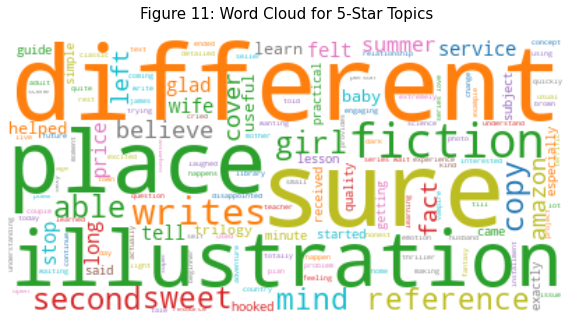

In [28]:
topic_cloud(df_5star['docs'],
            title="Figure 11: Word Cloud for 5-Star Topics\n",
            n_components=125, n_top_words=30)

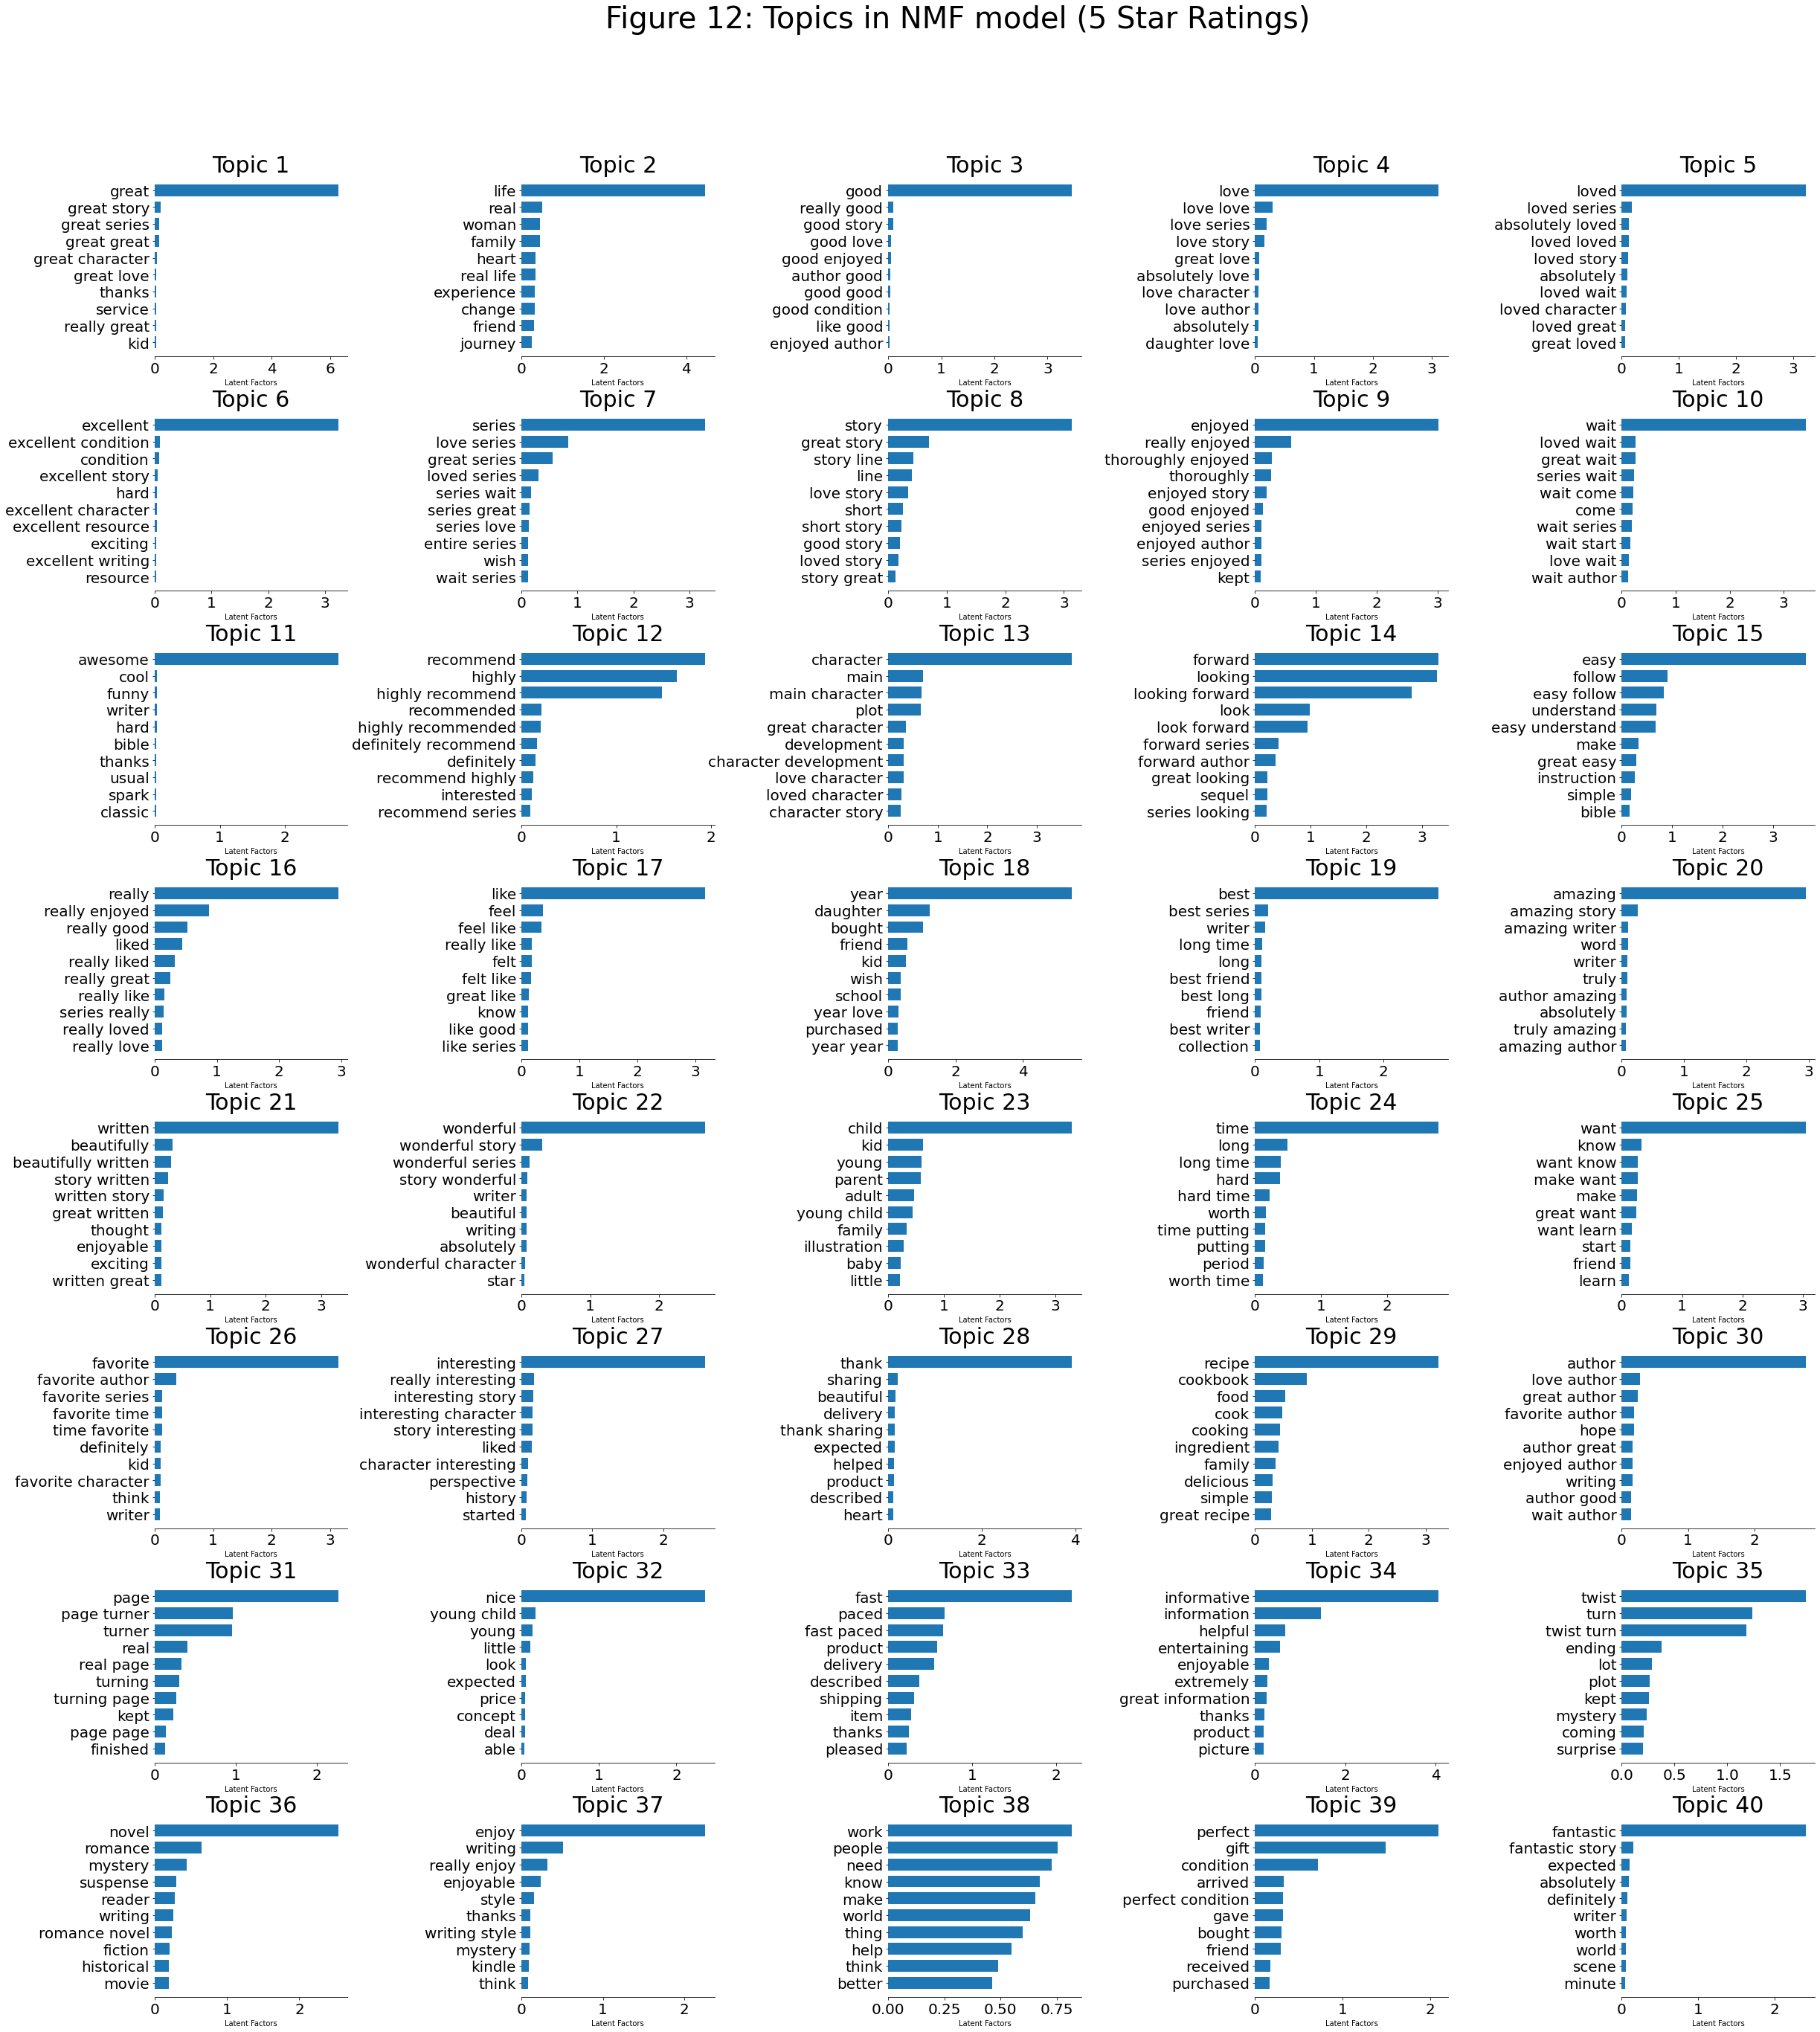

In [46]:
run_nmf(df_5star['docs'],
        title='Figure 12: Topics in NMF model (5 Star Ratings)')

### 4-Star Ratings

Based on the word cloud, the most frequently occuring words are `humor`, `second`, `come`, `right` and `sure`. Books that are humurous and the second part of a series may have been rated more frequently with 4 stars. Upon further inspection of the latent factors, the topics that can be gleaned are almost similar to the 5-star ratings. We can still see `good storyline and characters` (Topic 2,3,4, 33), `enjoyable and interesting` (Topic 4,5,6,37), `family books` (Topic 18), `quick and easy` (Topic 19), `books that are part of a series` (Topic 20), `books that were based from a movie or were made to a movie` (Topic 31), `recipes` (Topic 32), `page turners` (Topic 34), `plot twists and turns` (Topic 23), ` good ending` (Topic 28), and `thought-provoking` (Topic 38 and 39). At the 4-star rating mark, we begin to see some negative topics. The new topic for 4-star rating was `slow and predictable books` (Topic 21).

Most of the descriptive words in the 4-star rating topics are also positive, with words such as `enjoyed`, `good`, `great` and `interesting`.

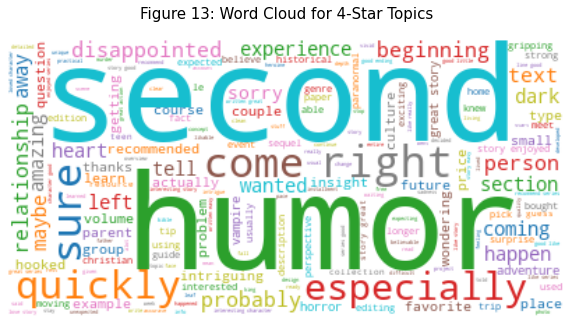

In [47]:
topic_cloud(df_4star['docs'],
            title="Figure 13: Word Cloud for 4-Star Topics\n",
            n_components=134, n_top_words=30)

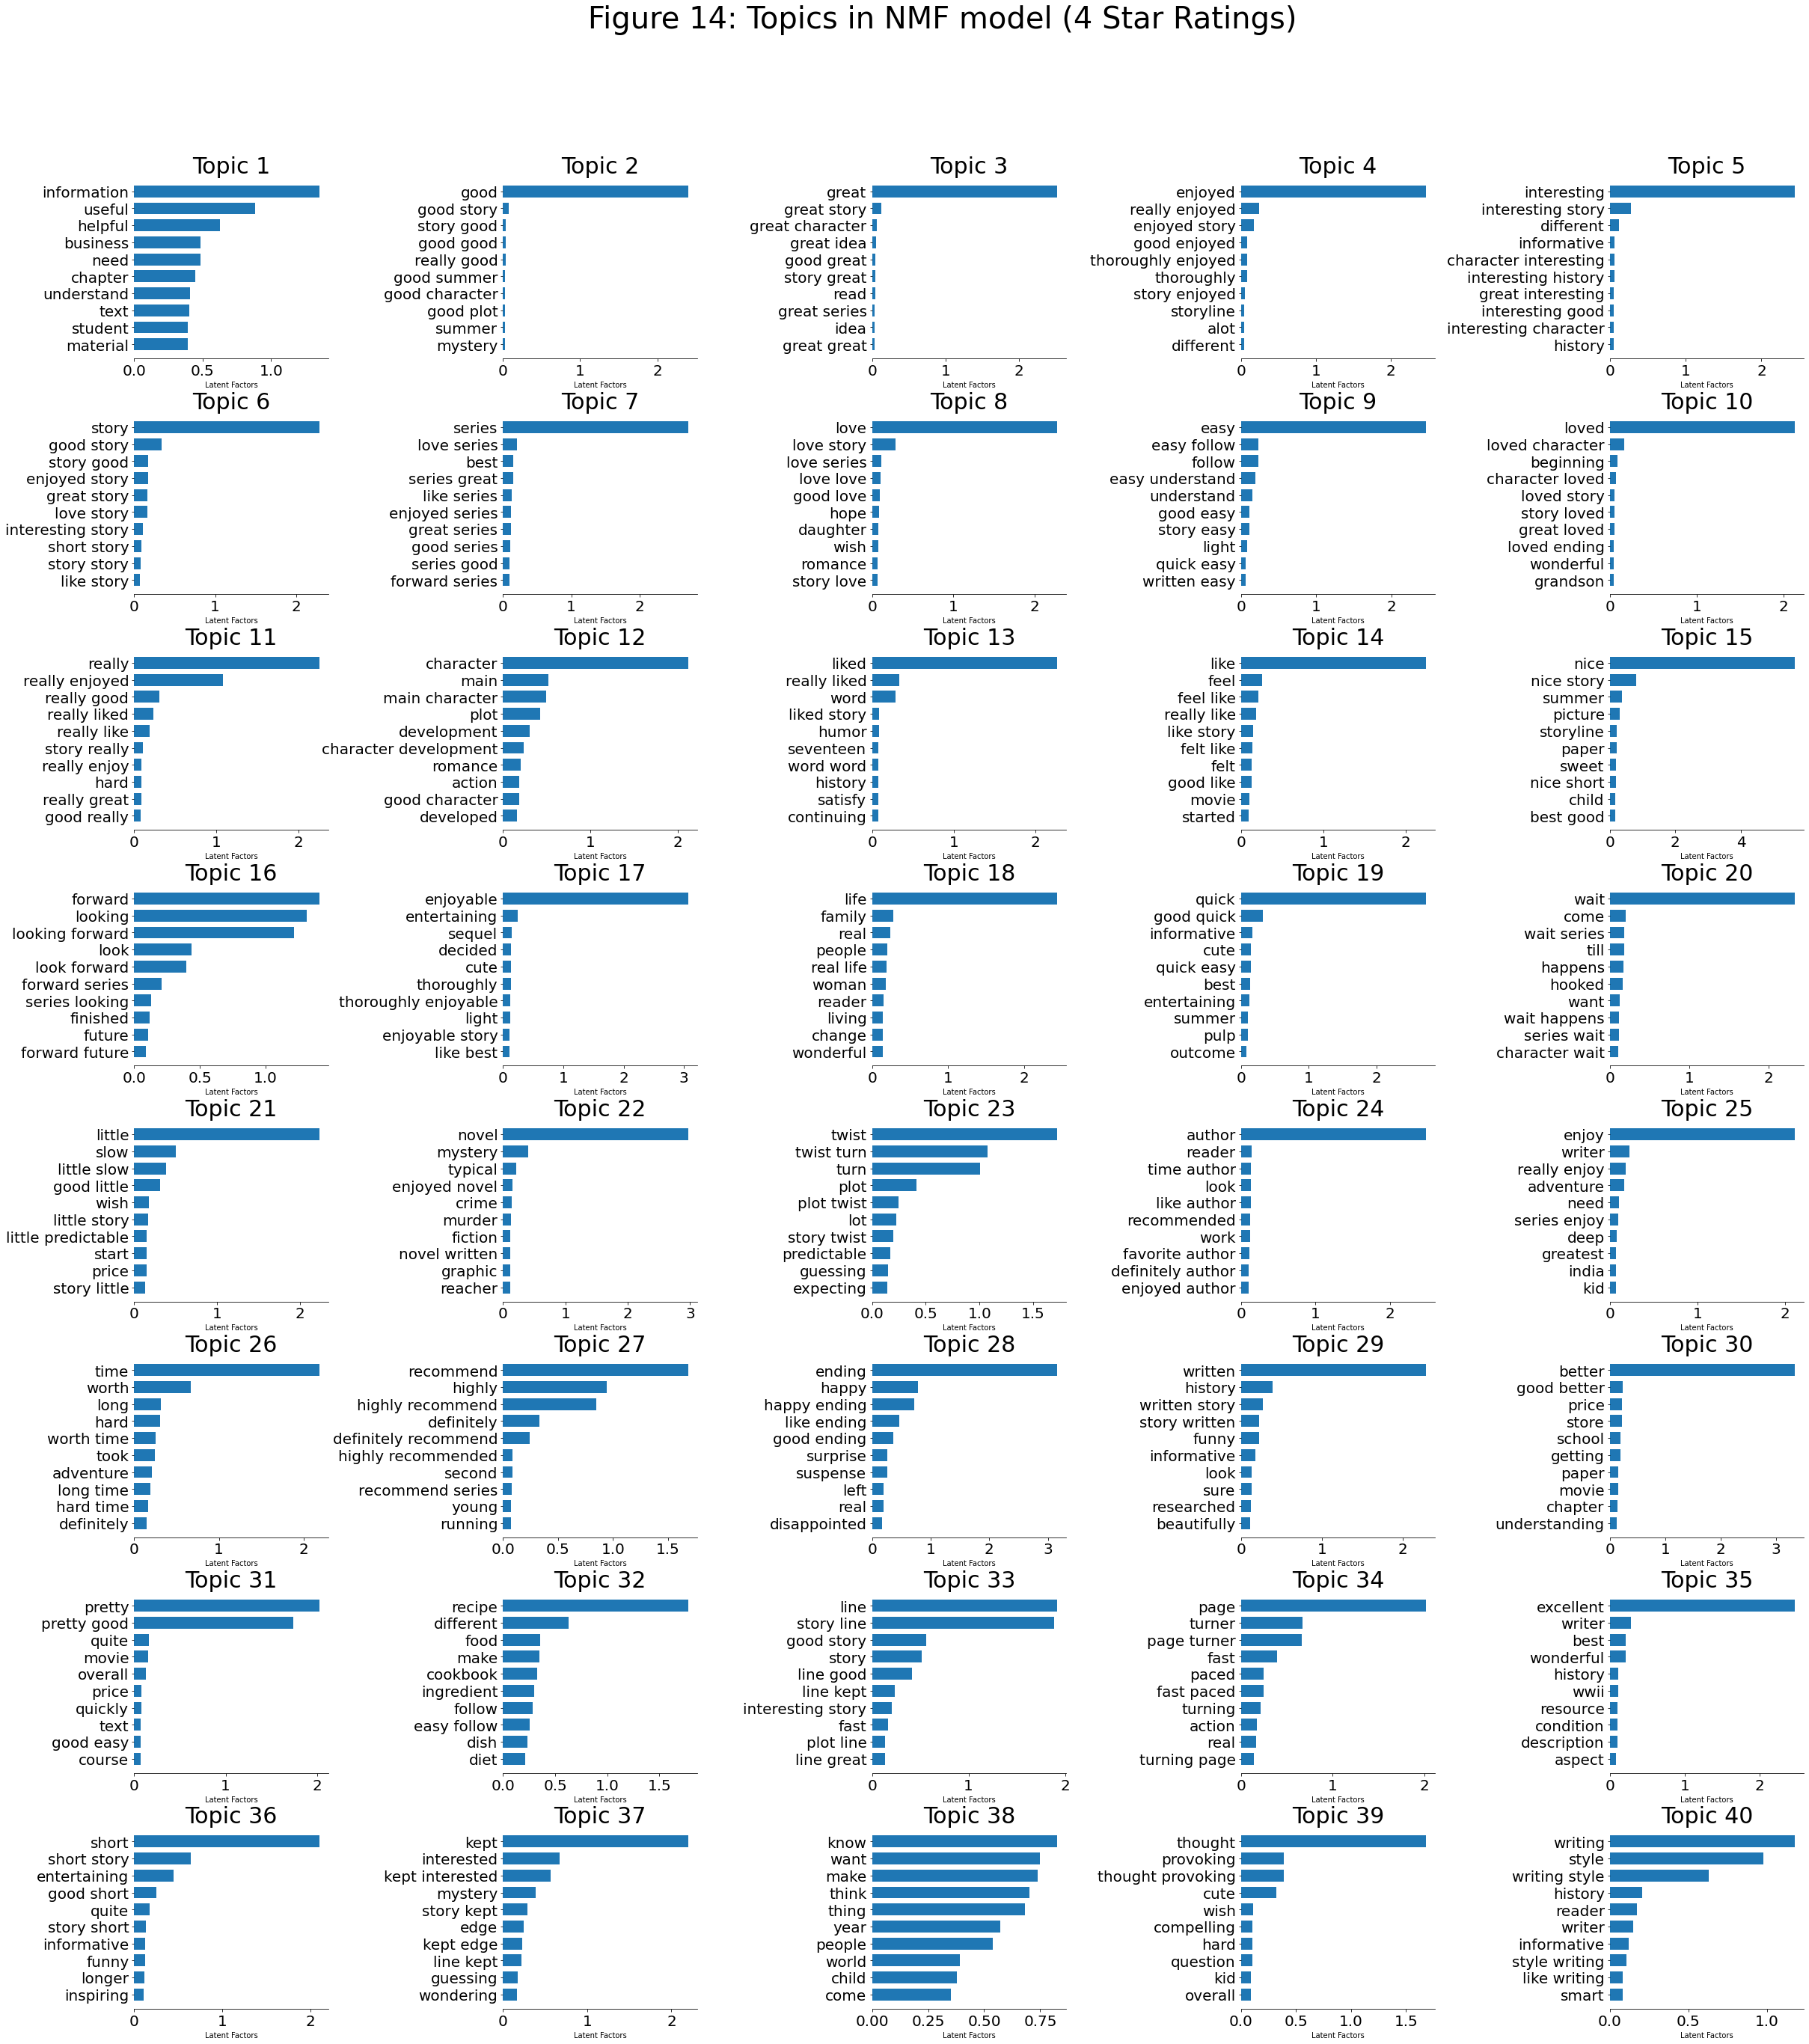

In [48]:
run_nmf(df_4star['docs'],
        title='Figure 14: Topics in NMF model (4 Star Ratings)')

### 3-Star Ratings

The most frequently occuring words in the TDIDF cloud are `make`, `maybe`, `understand`, `heroine`, and `free`. Books rated with 3-stars may be about females and could have been received for free, and it is interesting that `maybe` has surfaced, which may denote tentativeness or room for improvement. Upon further inspection of the topics based on NMF, there are still `books that people enjoyed` (Topic 16), `good storylines and character development` (Topic 2,3,5,6,33 and 40), `cookbooks` (Topic 17), `page turners` (Topic 18). At the 3-star rating mark we start to see a clearer delineation with respect to how much people enjoyed the books, with topics about `disappointing and boring` (Topic 9, 26), `predictable` (Topic 10), `Kindle vs paperback` (Topic 29), `basic, beginner and simple` (Topic 34), `disappointing ending` (Topic 24), `grammatical error` (Topic 12), and `slow start` (Topic 37). 

The positive descriptive words in the topic is relatively less compared to the 4-star and 5-star ating (as as cen expected). The words that we can see are `enjoyed`, `expected` and `good`.

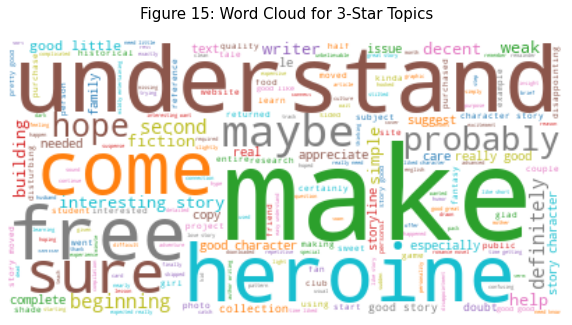

In [32]:
topic_cloud(df_3star['docs'],
            title="Figure 15: Word Cloud for 3-Star Topics\n",
            n_components=134, n_top_words=30)

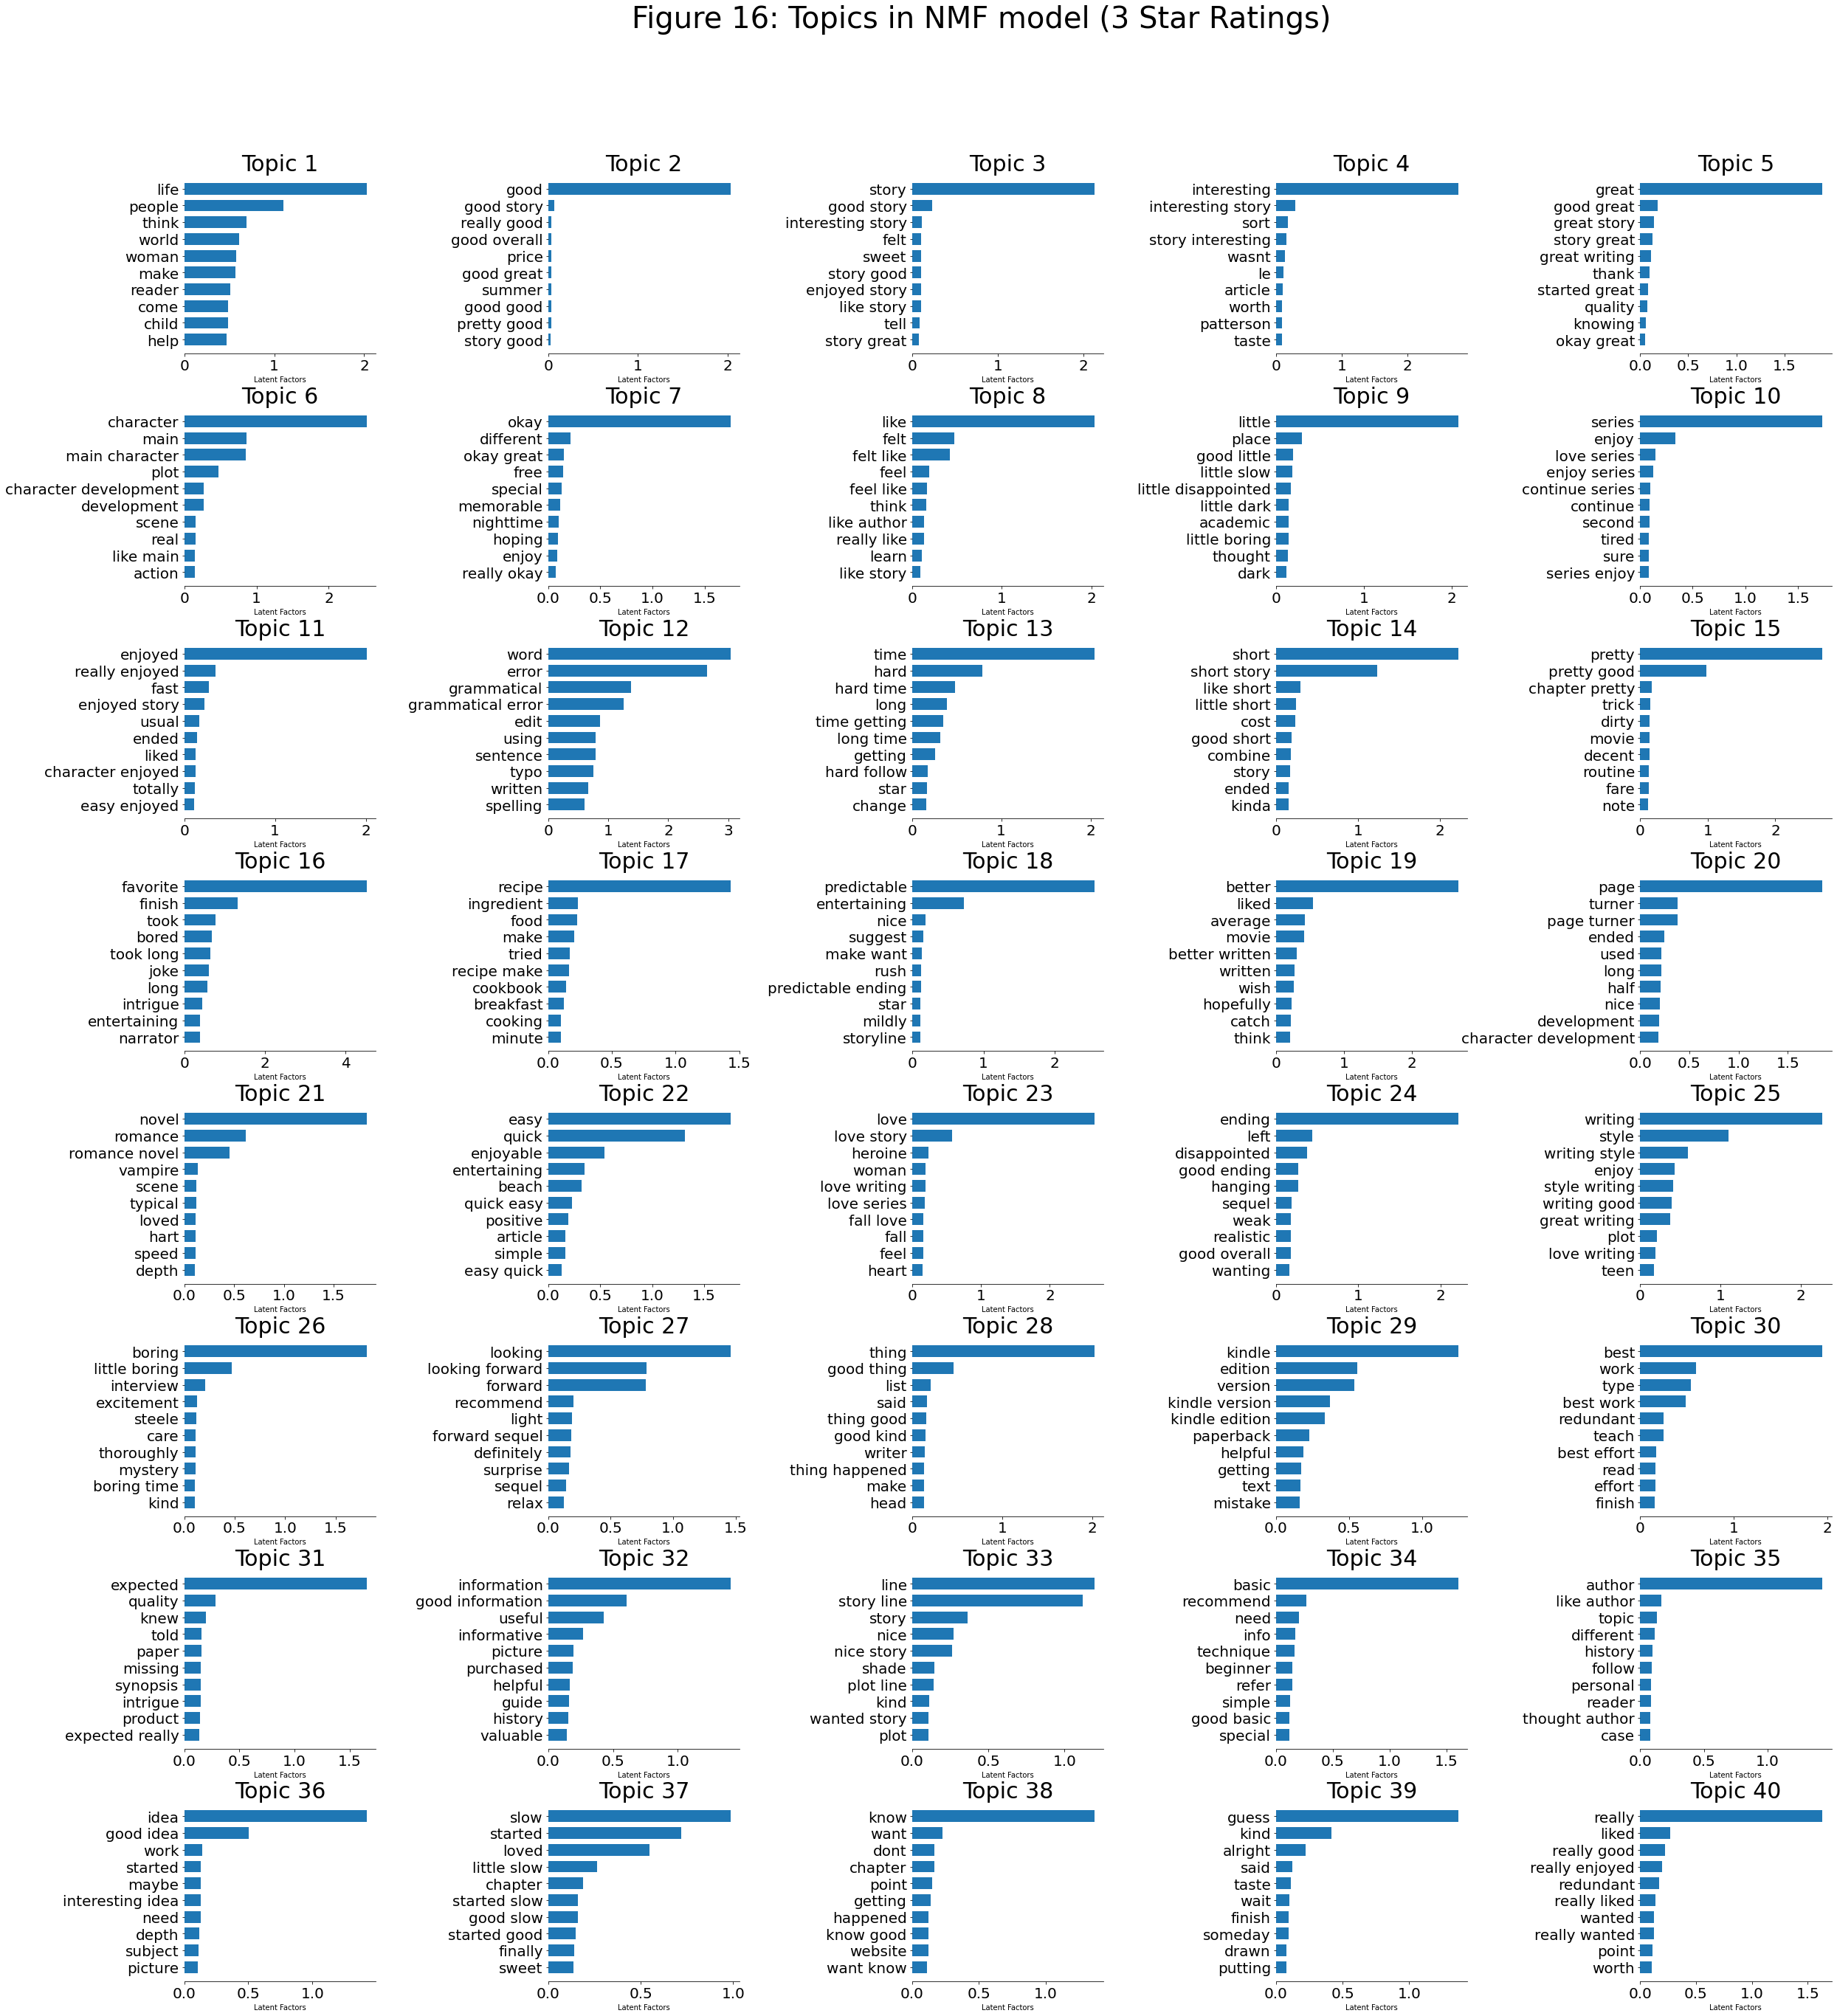

In [33]:
run_nmf(df_3star['docs'],
        title='Figure 16: Topics in NMF model (3 Star Ratings)')

### 2-Star Ratings

The wordcloud shows `author`, `like`, `thing`  and `time` are the most frequently occuring words, which can mean that most reviews are directed towards the book and the length of the book. Despite the word `like` occuring in the word cloud, the bag-of-words approach may not have been able to put the context - it is possible that it is `don't like` instead of just `like`. Hence, further inspection of the topics through latent factors is warranted. The topics based on NMF are showing more negative sentiment such as `boring` (Topic 6 and 13), `disappointing` (Topic 8, 11), `hard to follow` (Topic 10, 27), `outdated information` (Topic 16), `waste of money and time` (Topic 14), `weak plot and ending` (Topic 29), `slow moving` (Topic 33 and 34), `poorly written` (Topic 40) and `predictable` (Topic 37) `hard to finish` (Topic 13). There were still some topics regarding the `writing style` (Topic 1), `character and storyline` (Topic 5, 9) and some genres like `cookbook` (Topic 20) and `books about women/feminism`.

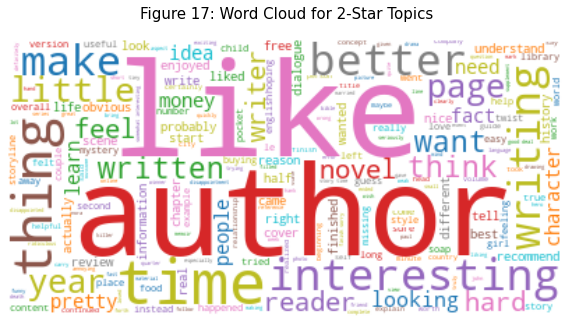

In [34]:
topic_cloud(df_2star['docs'],
            title="Figure 17: Word Cloud for 2-Star Topics\n",
            n_components=533, n_top_words=30,)

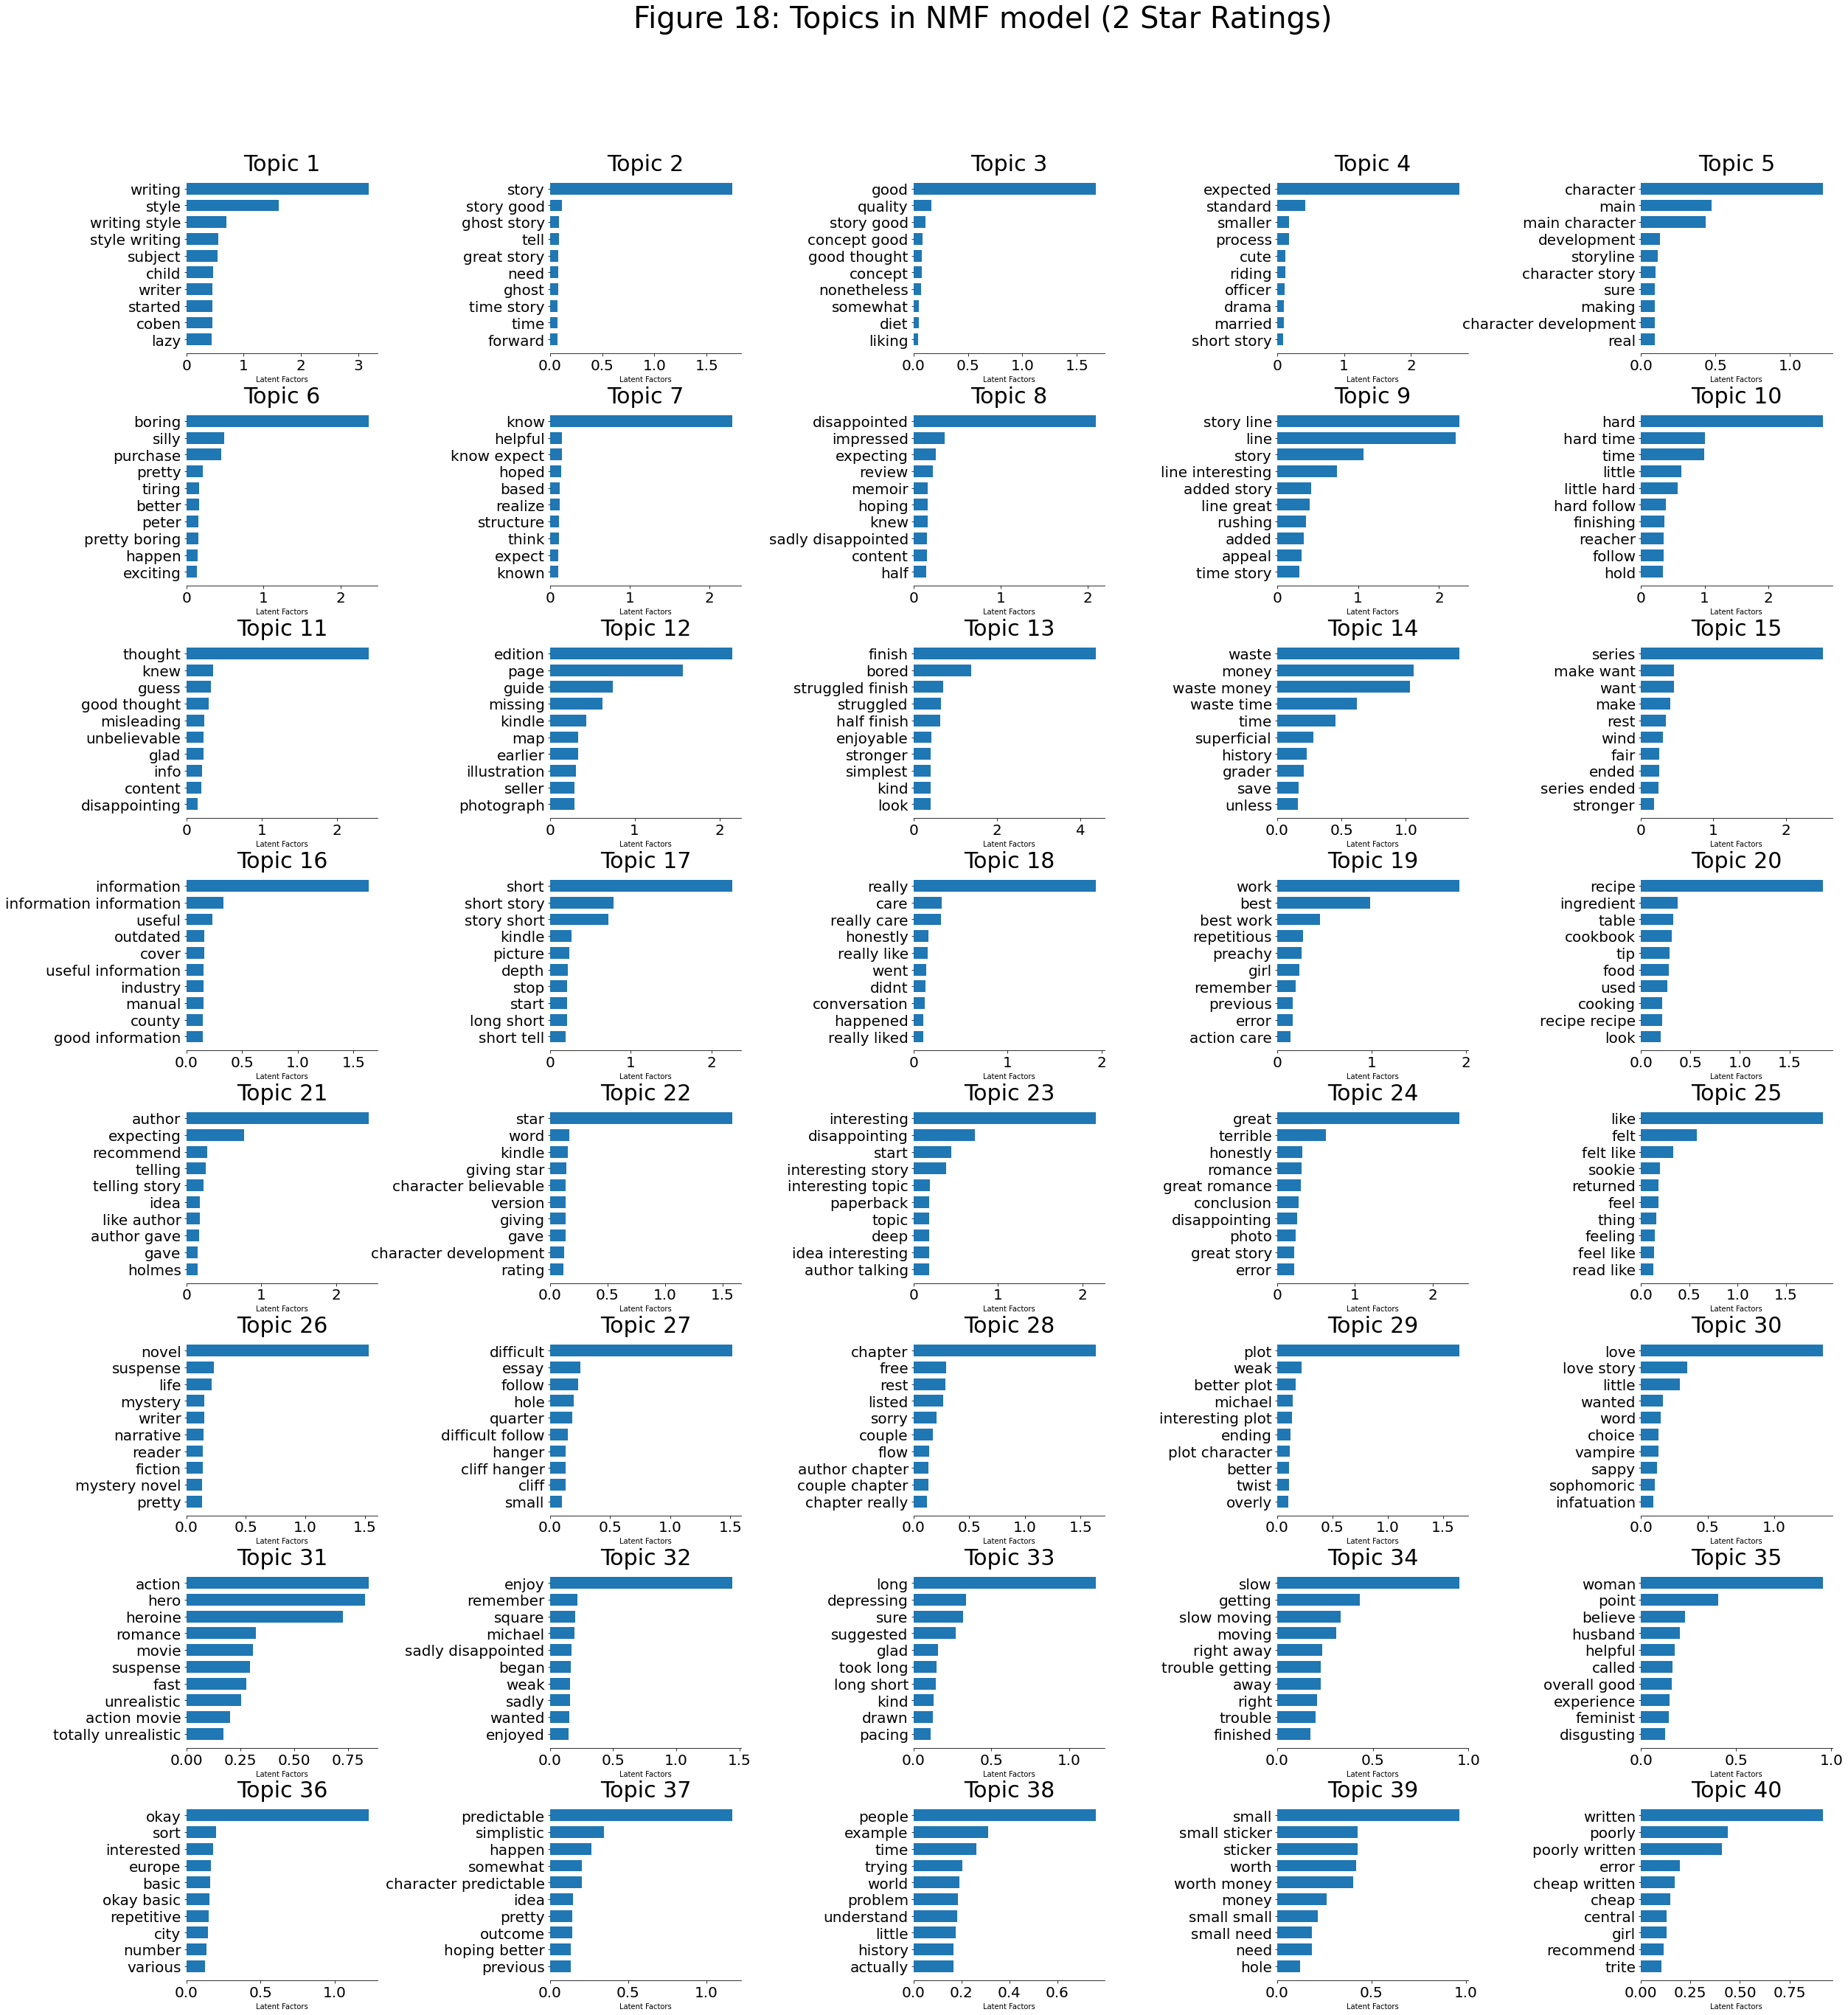

In [35]:
run_nmf(df_2star['docs'],
        title='Figure 18: Topics in NMF model (2 Star Ratings)')

### 1-Star Rating

The most frequent words for books rated with 1 star are `make`, `think`, `people`, `money`, and `thing`. This may point towards books that can be deemed as a waste of money, and further analysis of the topics using the latent factors seem to support that hypothesis. The topics based on NMF are `boring and predictable` (Topic 2), `waste of money` (Topic 3, 12), `weak character, plot or ending` (Topic 4, 29), `poorly written` (Topic 6, 37), `disappointed` (Topic 15, 28), `silly` (Topic 24), `predicable` (Topic 30), `unrealistic` (Topic 31), and `difficult to follow/understand` (Topic 34). There were also some technical and kindle related issues such as `wrong order` (Topic 22, 23), `missing pages` (Topic 6), `access code issues` (Topic 31) and `deleted from Kindle` (Topic 11), and `wrong answers` in a texbook (Topic 19). Genres that surfaced are `cookbooks`, `restaurant guides`, `books about women/abuse`. Some descriptive words in the topics include `disturbing`, `terrible` and `disappointed`.

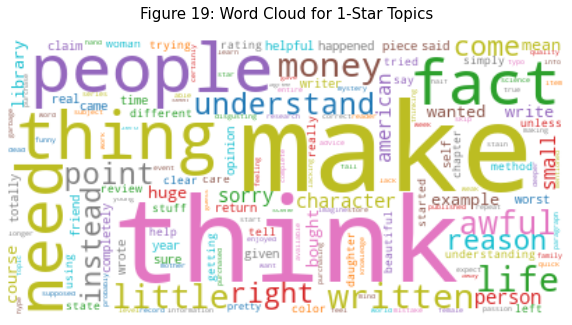

In [36]:
topic_cloud(df_1star['docs'],
            title="Figure 19: Word Cloud for 1-Star Topics\n",
            n_components=600, n_top_words=30)

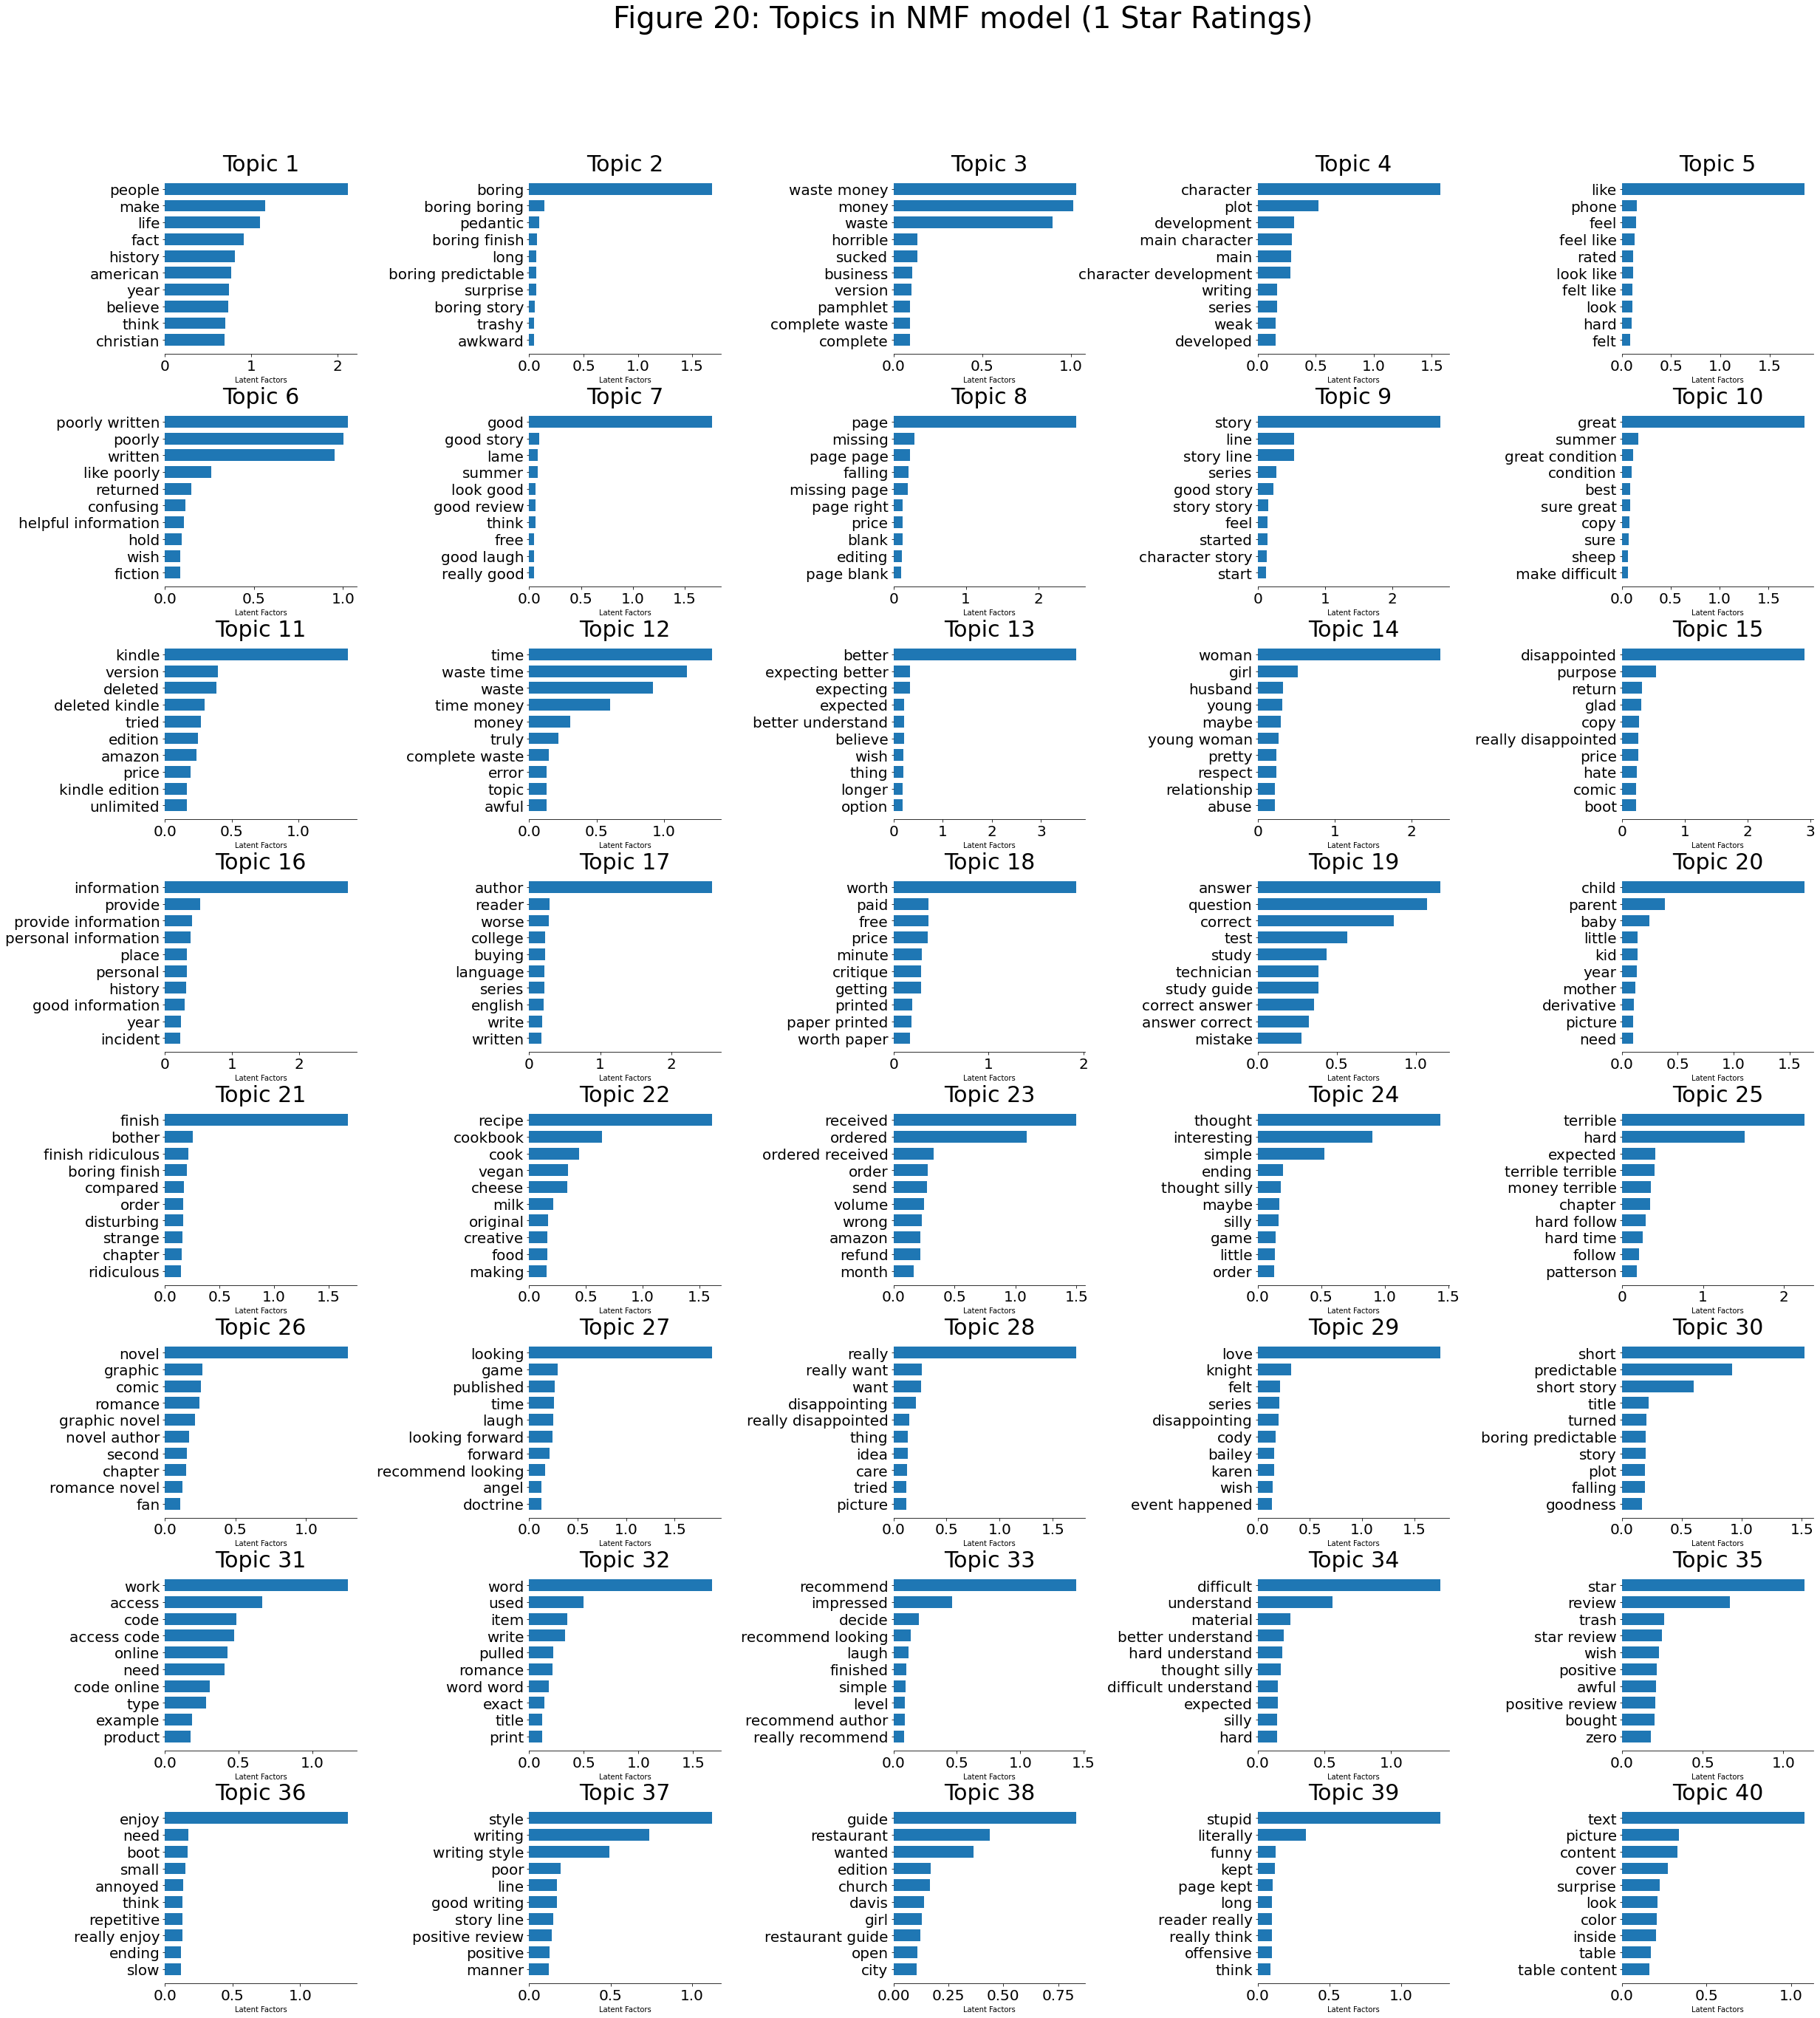

In [37]:
run_nmf(df_1star['docs'],
        title='Figure 20: Topics in NMF model (1 Star Ratings)')

### Ratings from Verified Purchases

The words that most frequently occur in Amazon verified purchases reviews are `original`, `heard`, `hoping`, `completely`. Upon further inspection of the latent features to uncover the topics, it seems that most are positive with topics including `great, interesting storylines` (Topic 1,2,5,4,28 and 30), `excellent condition` (Topic 6), `enjoyable` (Topic 8, 25), `good character development` (Topic 15), `part of a book series` (Topic 11, 7, 19), `author's writing style` (Topic 22, 33, 23), `informative` (Topic 40). Some book genre also surfaced such as `mystery` (Topic 36), `page turners` (Topic 32, 39), `informative books` (Topic 40) and `recipes` )topic 37). Specific to fulfilmment, verified purchases also rated on `fast delivery` (Topic 34)

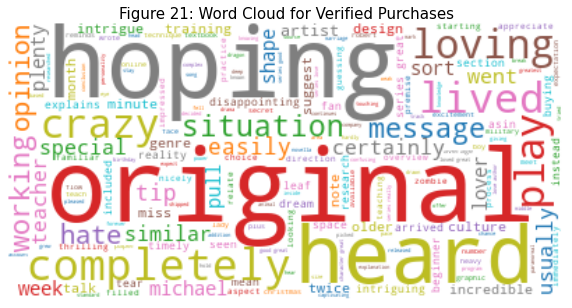

In [38]:
topic_cloud(df_verified['docs'], title="Figure 21: Word Cloud for Verified Purchases",
            n_components=450, n_top_words=30)

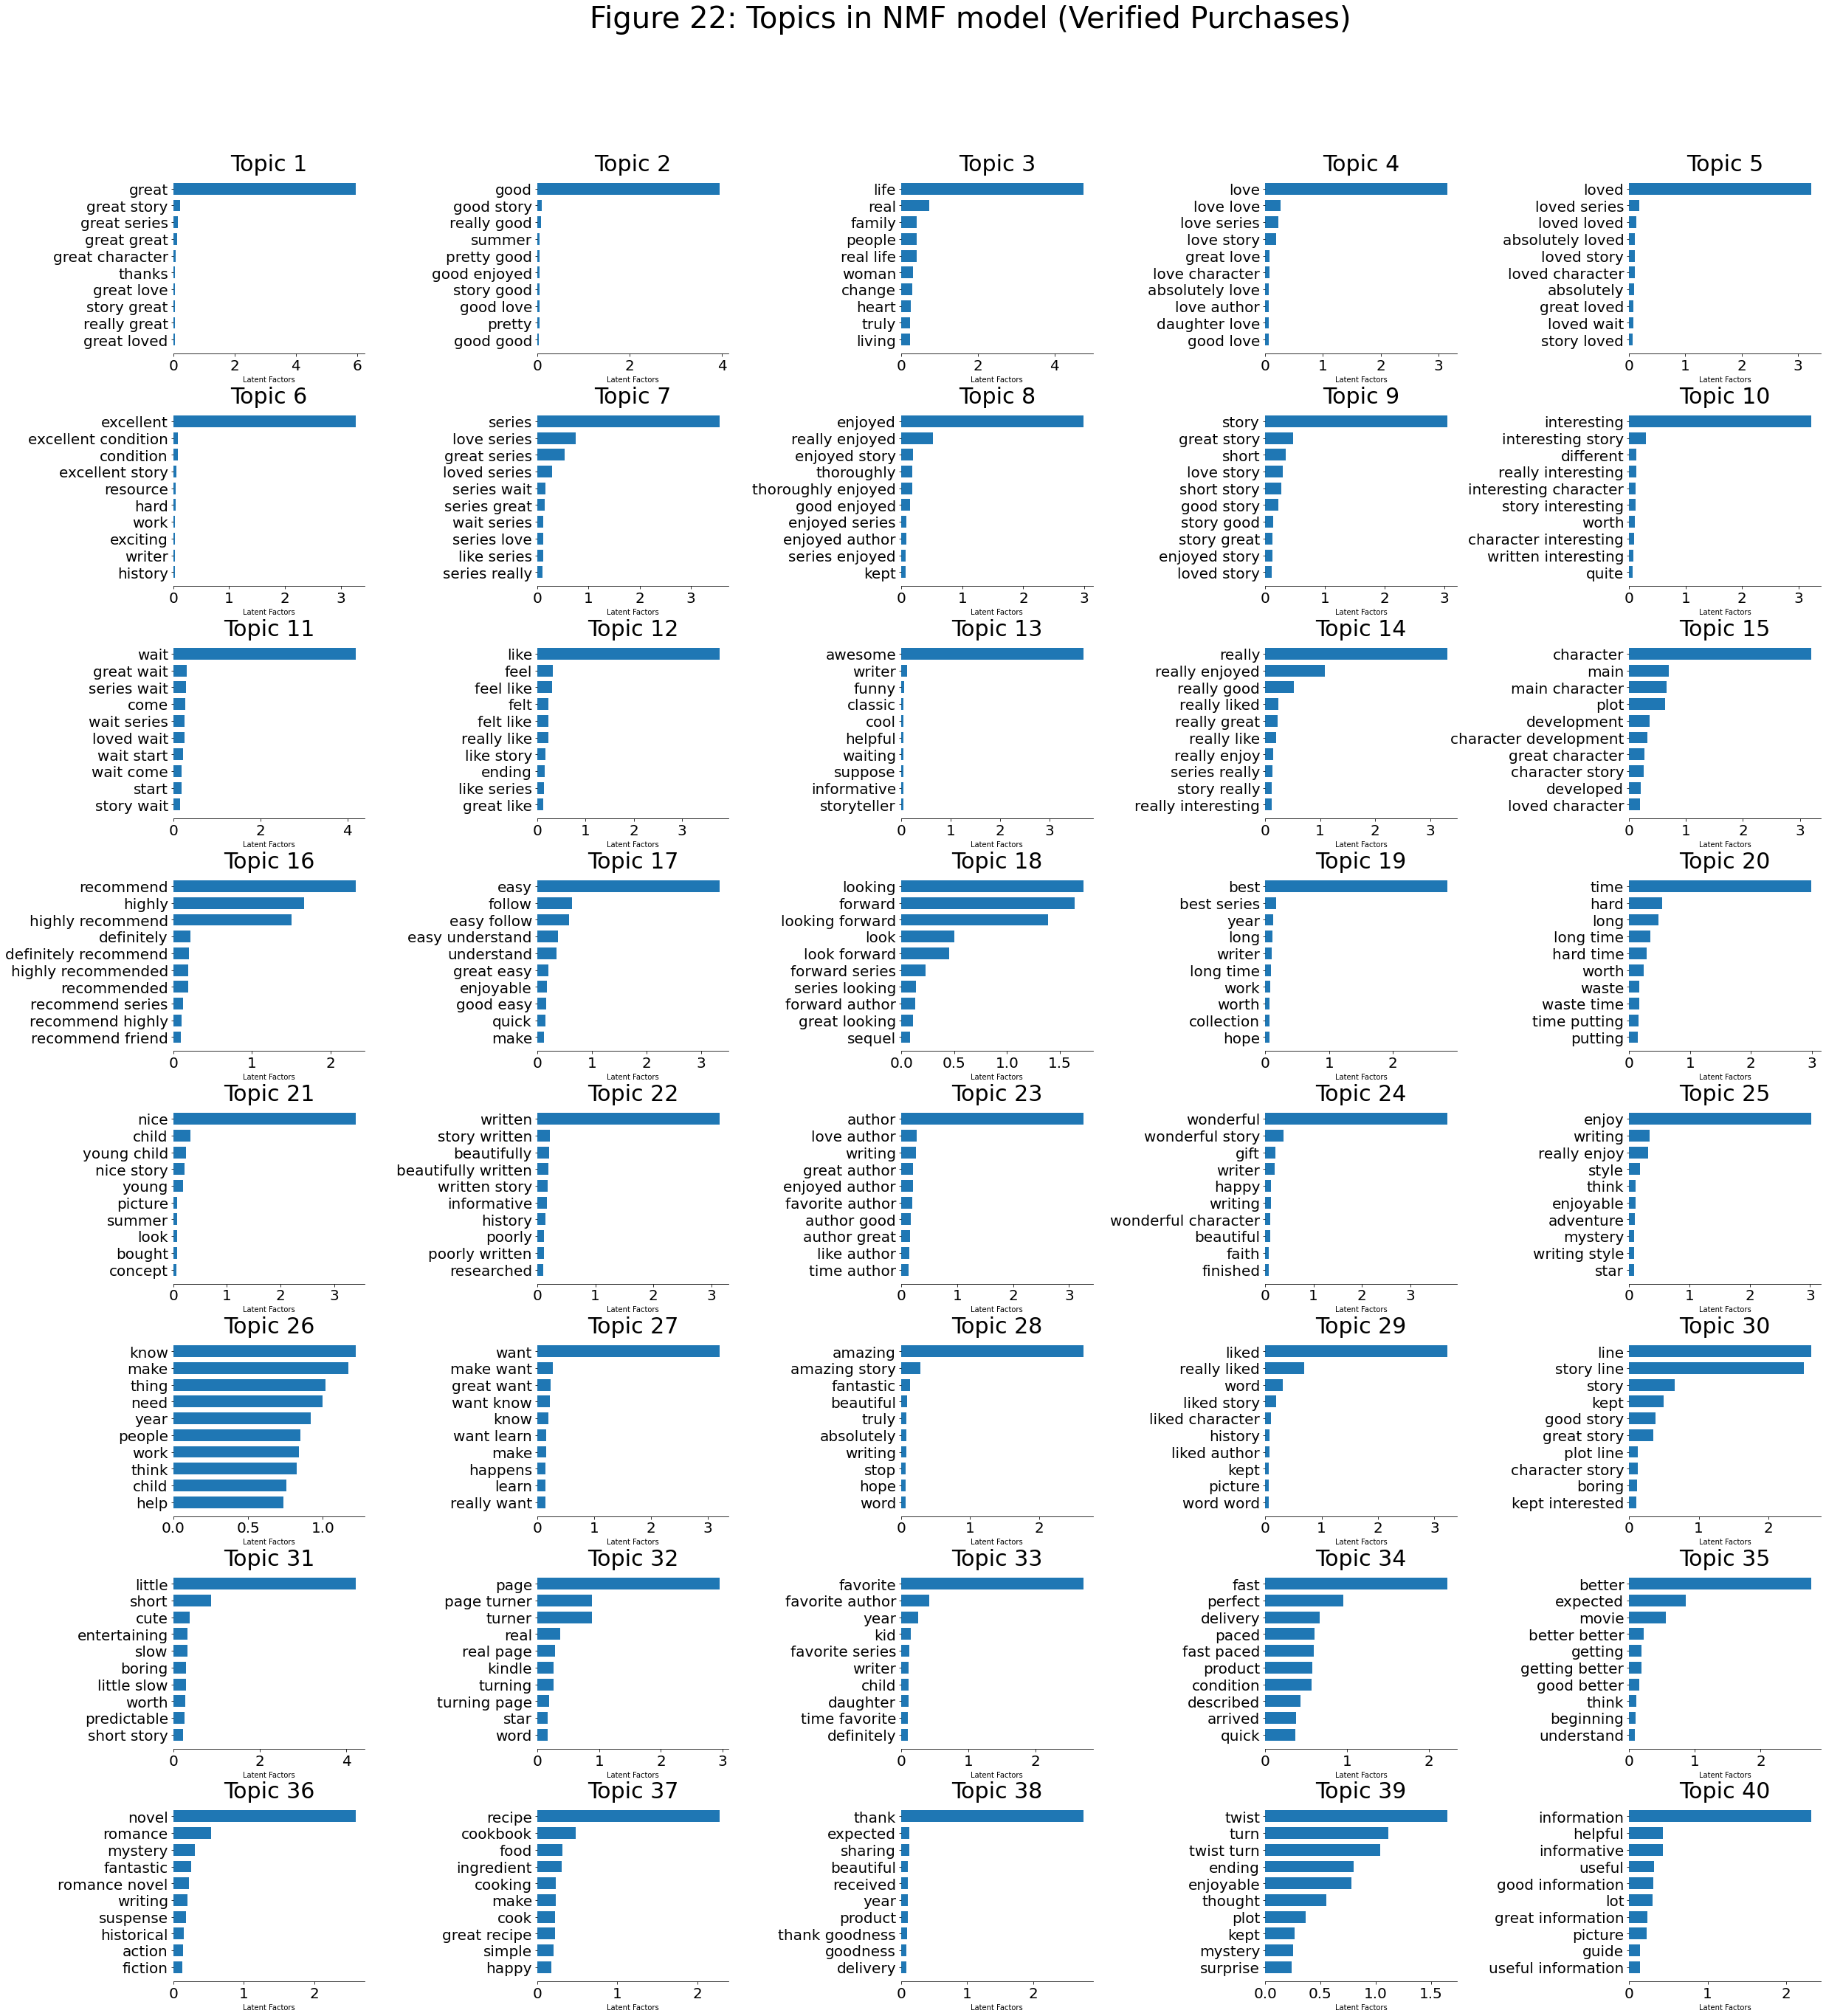

In [39]:
run_nmf(df_verified['docs'], title='Figure 22: Topics in NMF model (Verified Purchases)')

### Ratings from Amazon Vine

The most frequent words in the TDIDF cloud are `like`, `story`, `author`, `time`. Vine purchases seem to be more on the positive side as well, and review of the topics found using NMF confirms this hypothesis. The topics are also more on the positive side. This includes `great writing style, storyline and characters` (Topic 1,3,6,8,13,21,22,27),`part of a book series` (Topic 7,10,14,19), `easy to understand` (Topic 15), `favorite author` (Topic 20, 26, 30), `children's books` (Topic 23, 32), `recipes` (Topic 29), `page turners` (Topic 31), `informative` (Topic 34), `twists and turns` (Topic 35), `good condition for gifts` (Topic 38) and `fast delivery` (Topic 38).

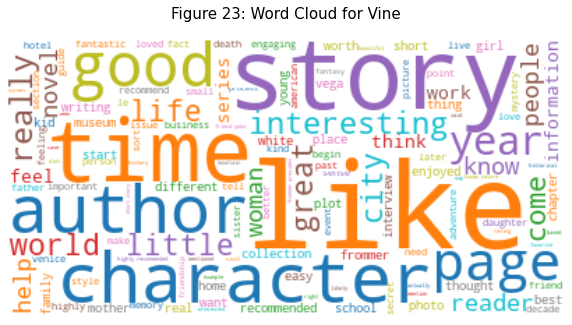

In [40]:
topic_cloud(df_vine['docs'],
            title="Figure 23: Word Cloud for Vine\n",
            n_components=533, n_top_words=30)

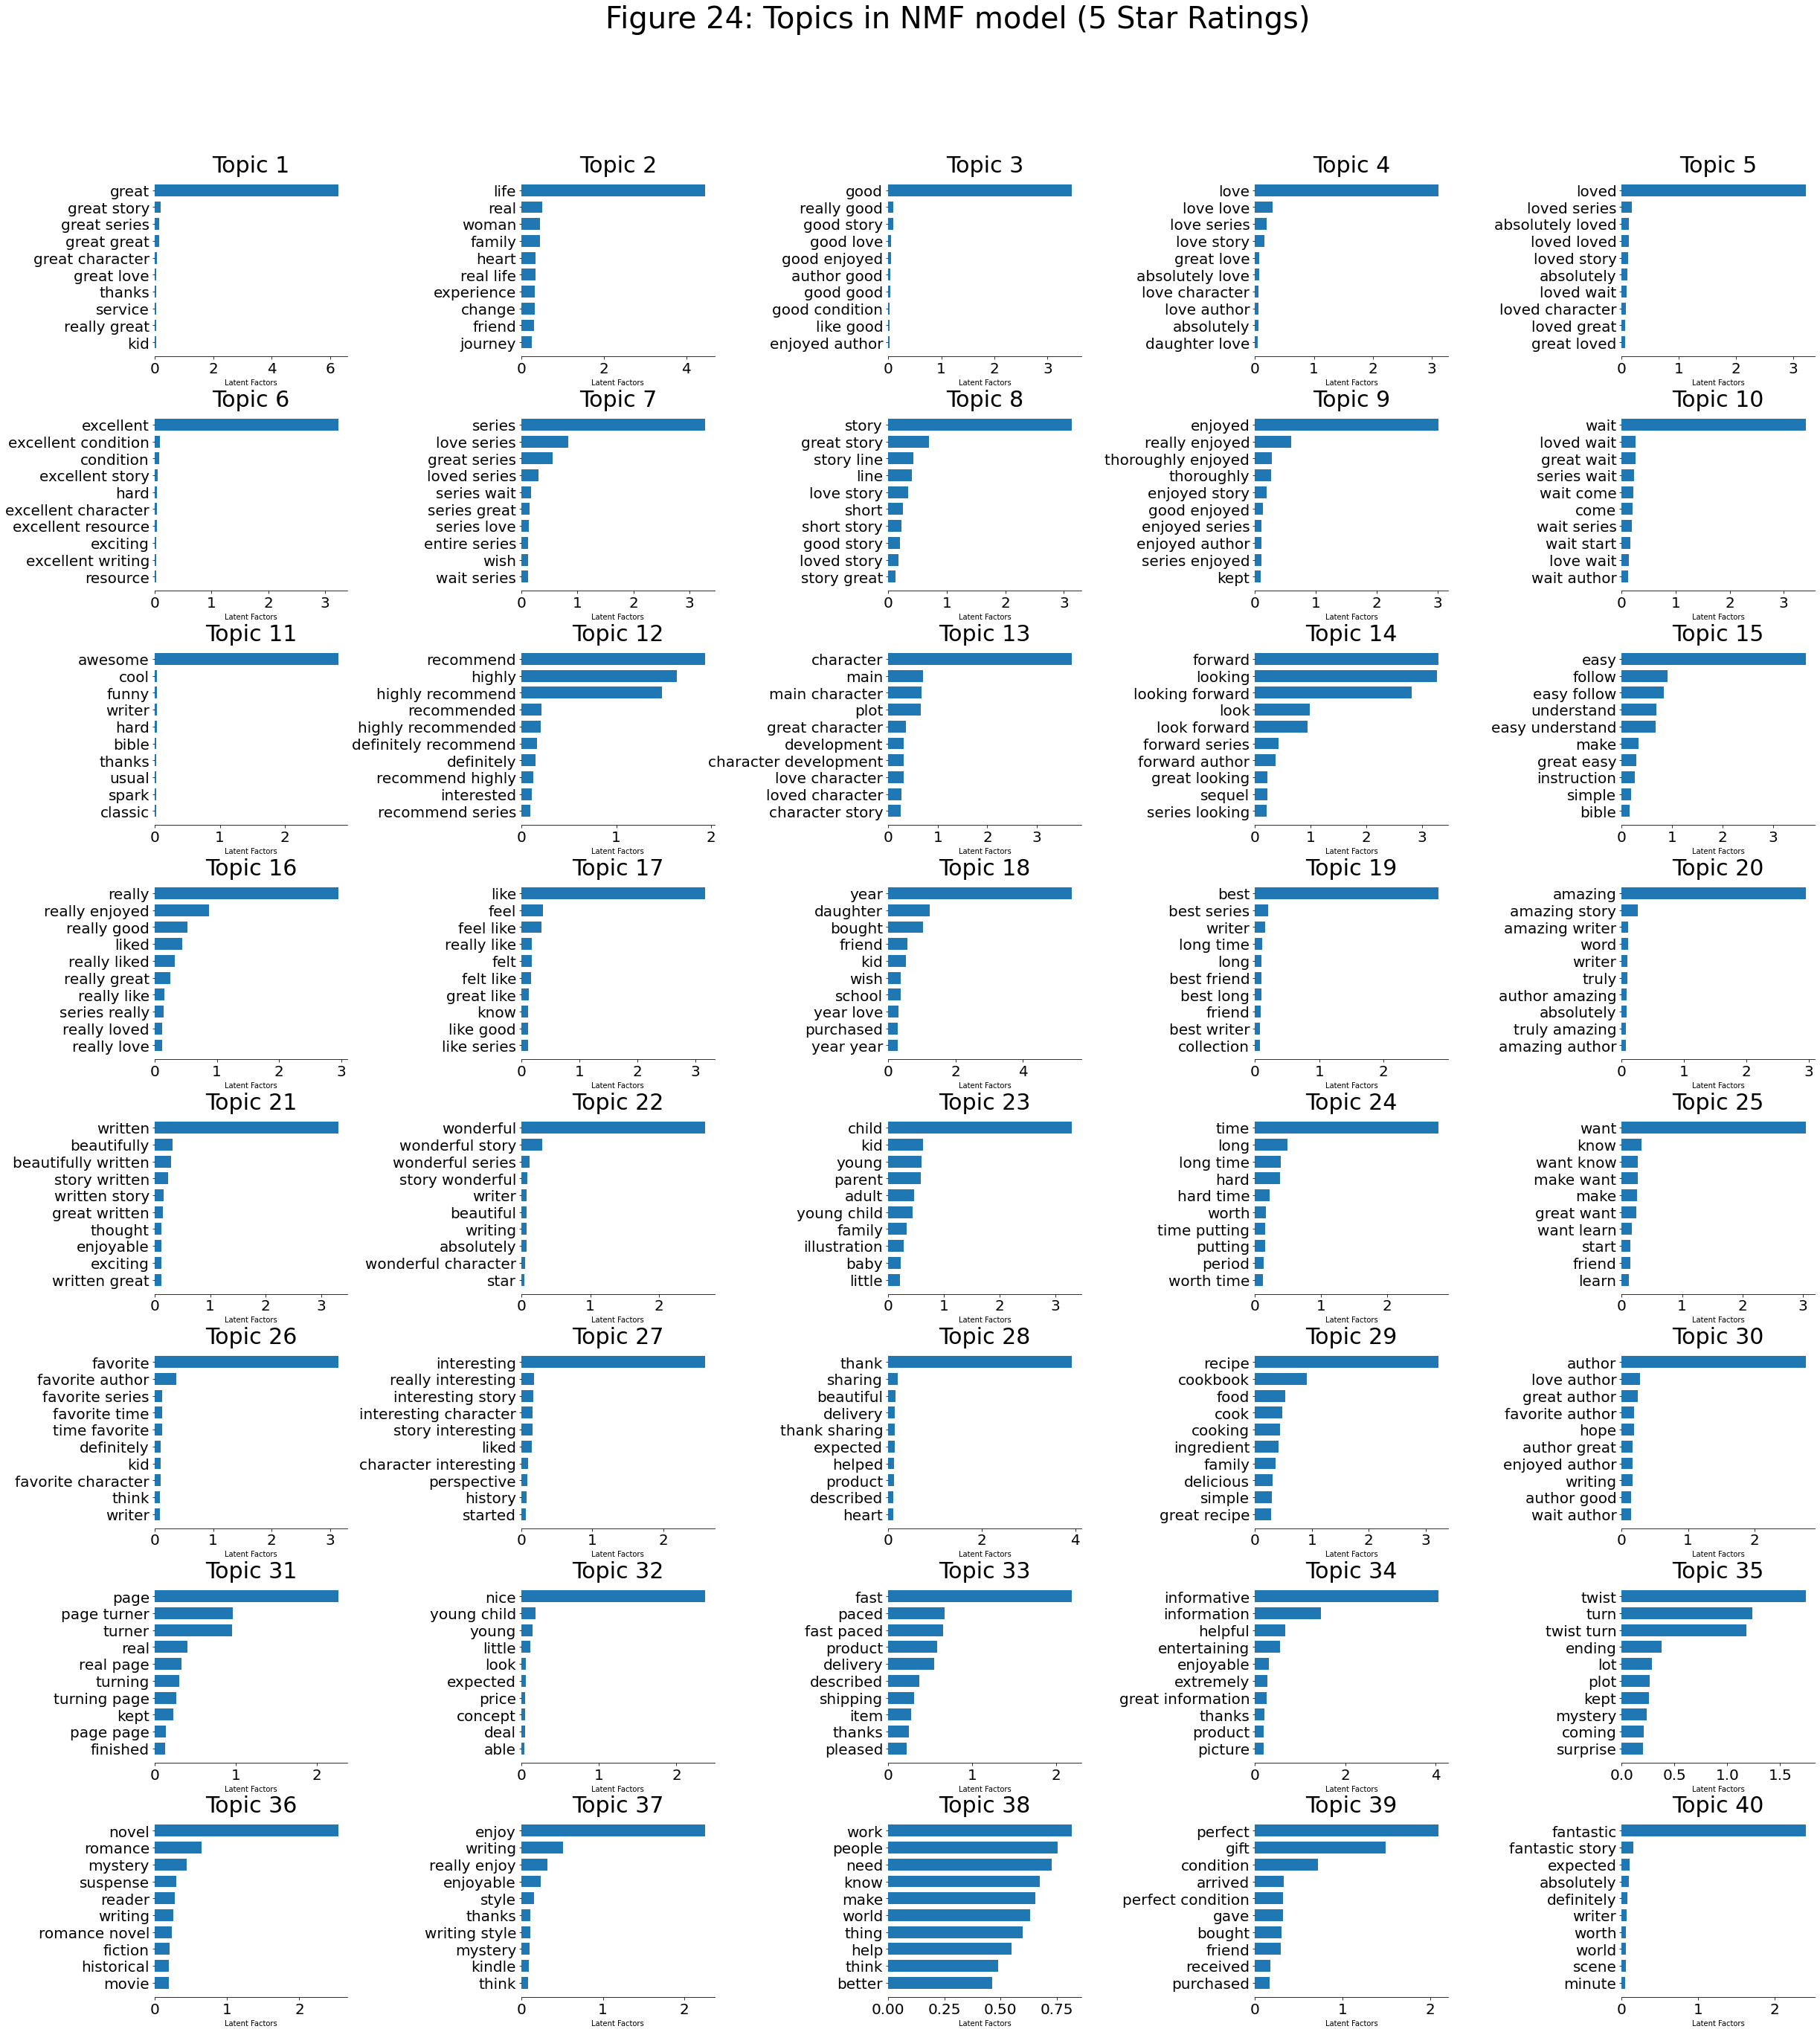

In [41]:
run_nmf(df_5star['docs'],
        title='Figure 24: Topics in NMF model (5 Star Ratings)')

### Ratings of ebooks

The most frequently occuring words in the TDIDF could are `overall`, `happened`, `perfect`, `scene`, `thriller`. The top words do not seem to point to a particular topic so we will turn to the NMF latent factors to divine other topics. The topics are `great story and character` (Topic 3,6,8,10,11,13,15,29,36), `part of a book series` (Topic 4,5,7,9), `writing style` (Topic 18), `easy to follow` (Topic 19), `worth time` (Topic 20), `short story` (Topic 23), `favorite author` (Topic 22, 35), `twists and turns` (Topic 24), `books that were turned to a movie or made to a movie` (Topic 30), `fast-paced` (Topic 37) and `good ending` (Topic 38).

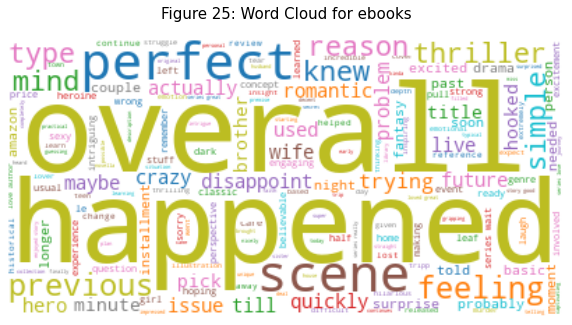

In [42]:
topic_cloud(df_ebooks['docs'],
            title="Figure 25: Word Cloud for ebooks\n",
            n_components=200, n_top_words=30)

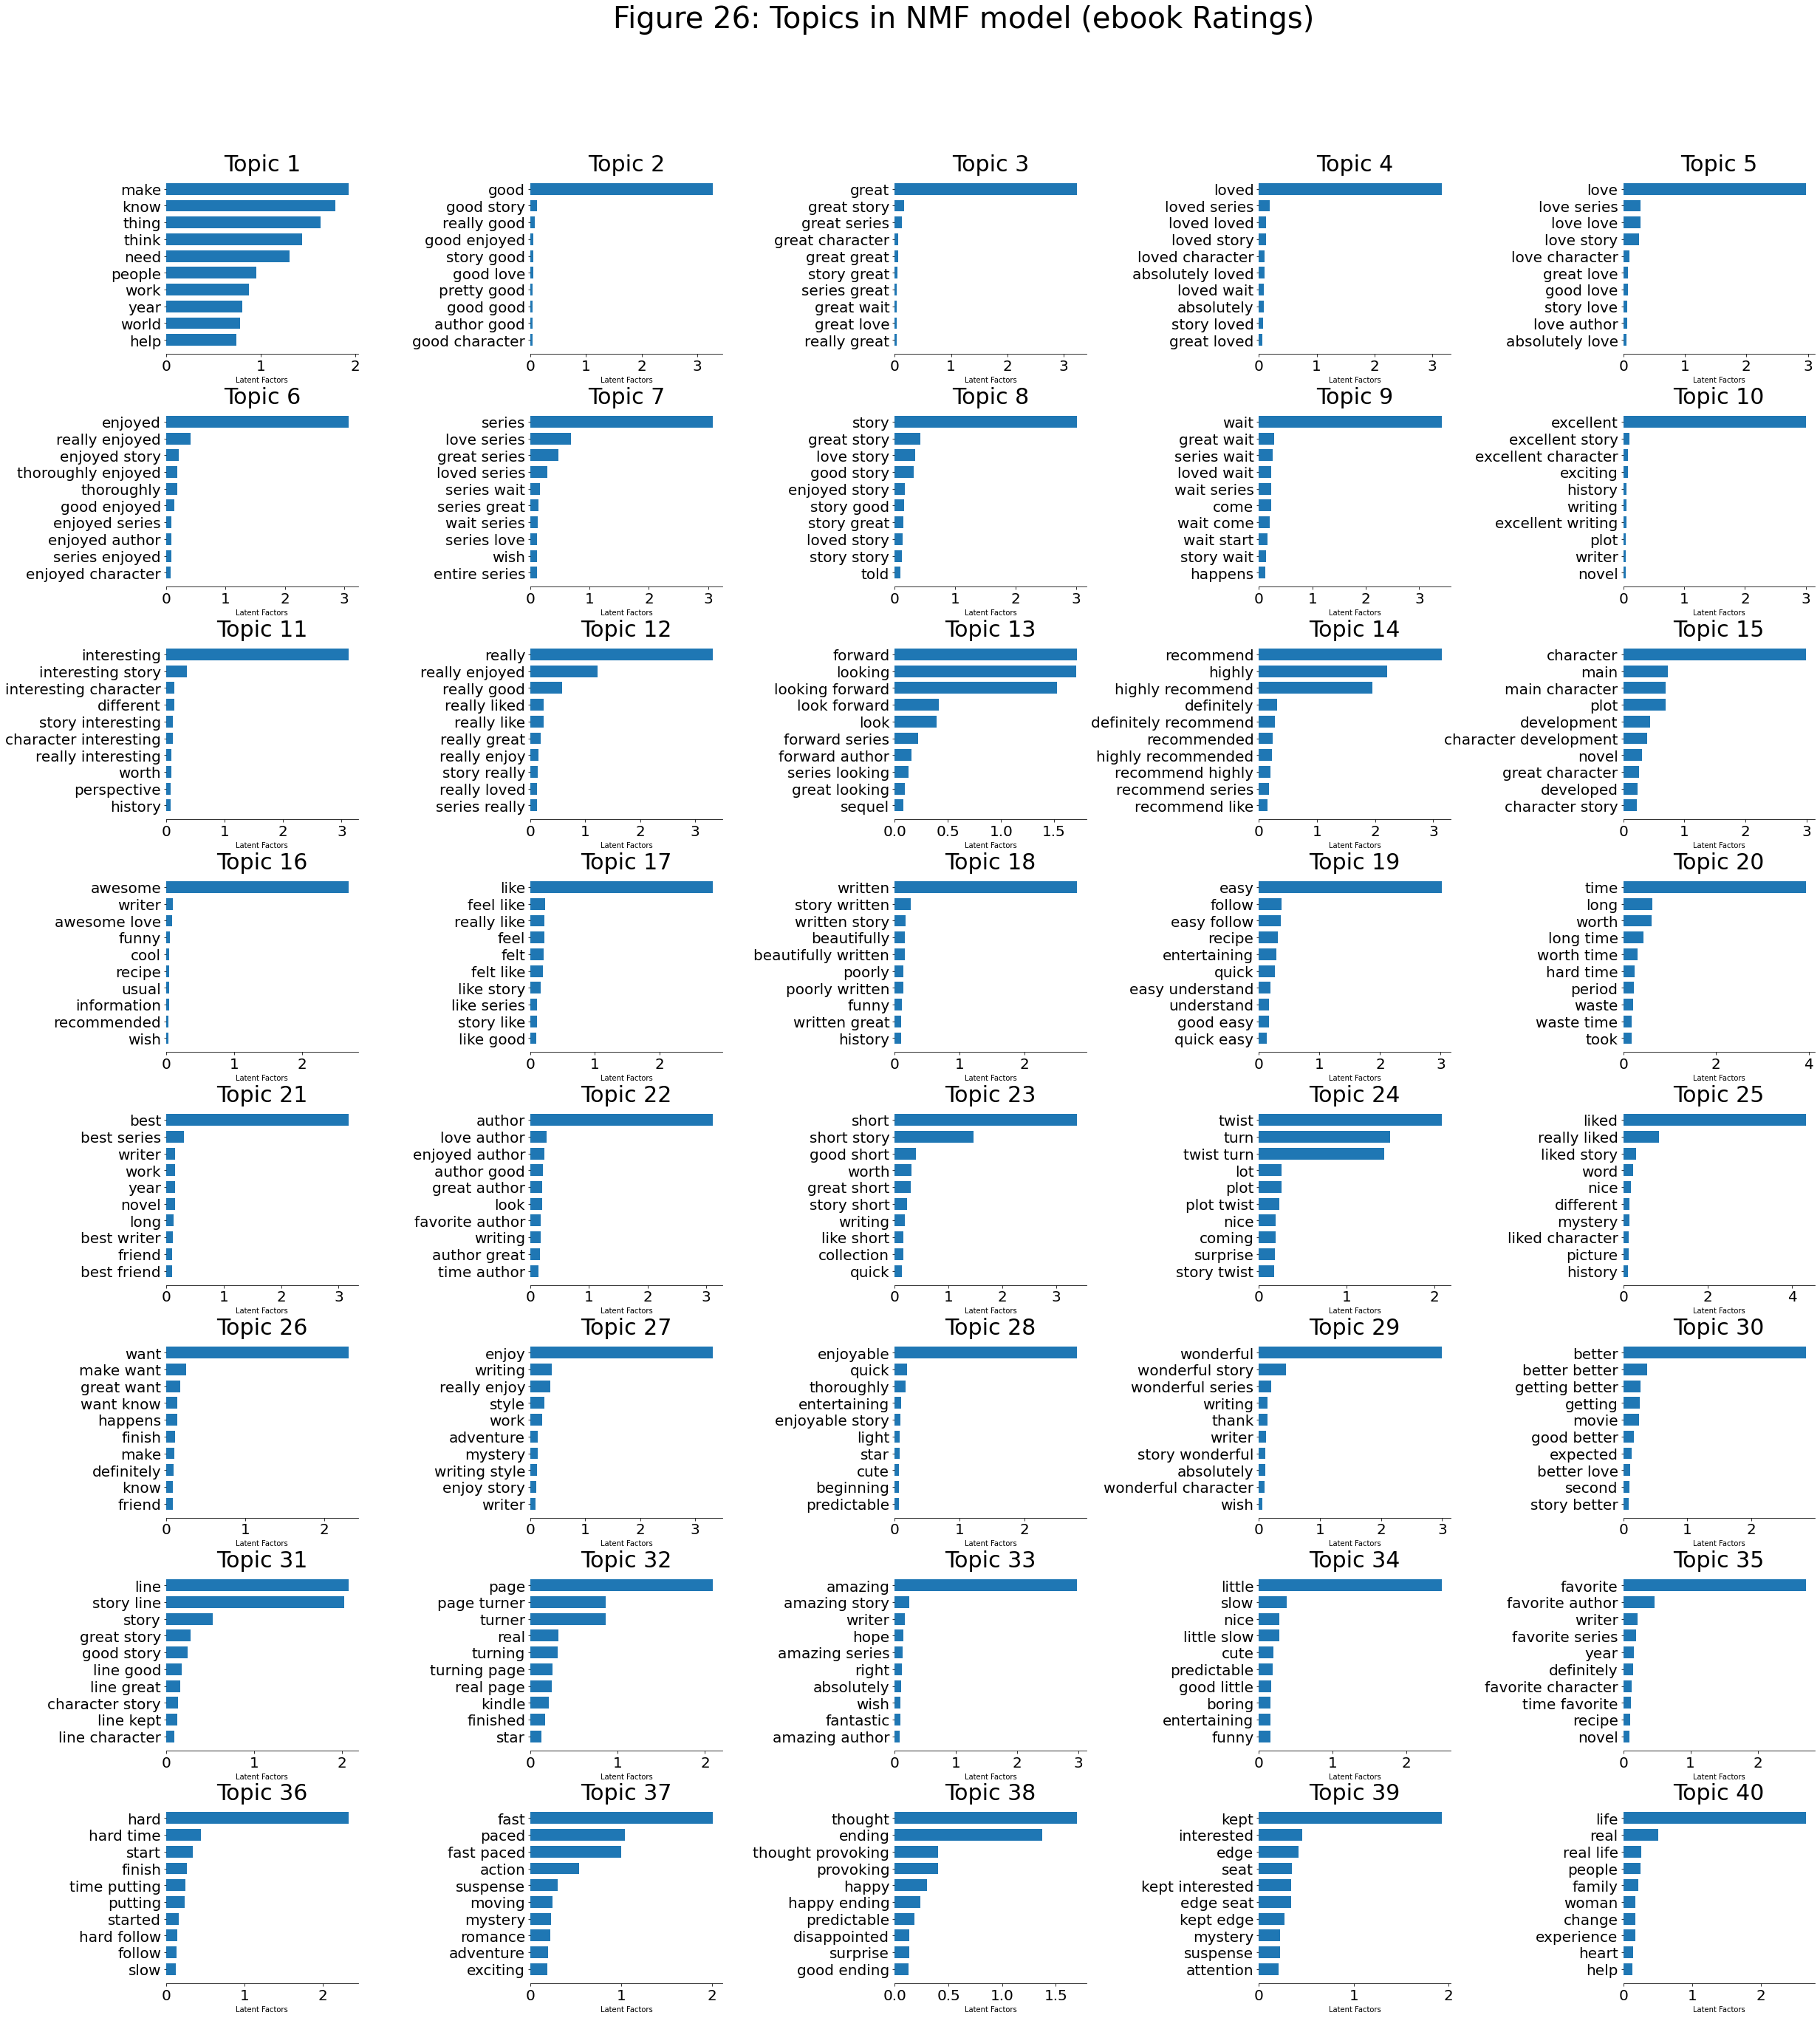

In [43]:
run_nmf(df_ebooks['docs'],
        title='Figure 26: Topics in NMF model (ebook Ratings)')

### Rating for books

The most frequently occuring words in the TDIDF matrix were `away`, `knew` and `list`. It is hard to discern a coherent thought for this so we turn to the latent factors again. The topics for books were also mostly positive and some of the usual genres also resurfaced. The topics are `character development and storyline` (topic 1,2,9), `good condition` (Topic 3,5,7, `business book` (Topic 6), `cookbooks` (Topic 8), `easy to follow` (Topic 5, `children's books` (Topic 11, 17) `good to give as a gift` (Topic 19), `good condition` (Topic 20), `part of a series` (Topic 18), `history book` (Topic 22), `informative` (Topic 21), `favorite author` (Topic 30), `religious books` (Topic 35), `coffee table books` (Topic 31), `fast delivery` (Topic 33).

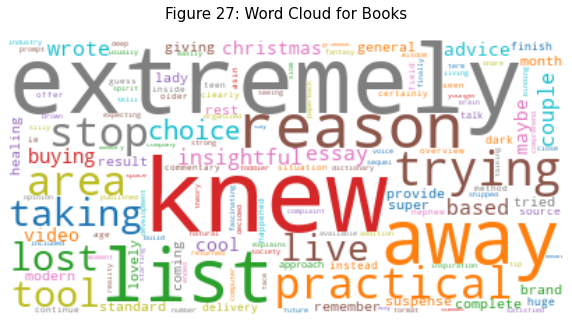

In [44]:
topic_cloud(df_books['docs'],
            title="Figure 27: Word Cloud for Books\n",
            n_components=400, n_top_words=30)

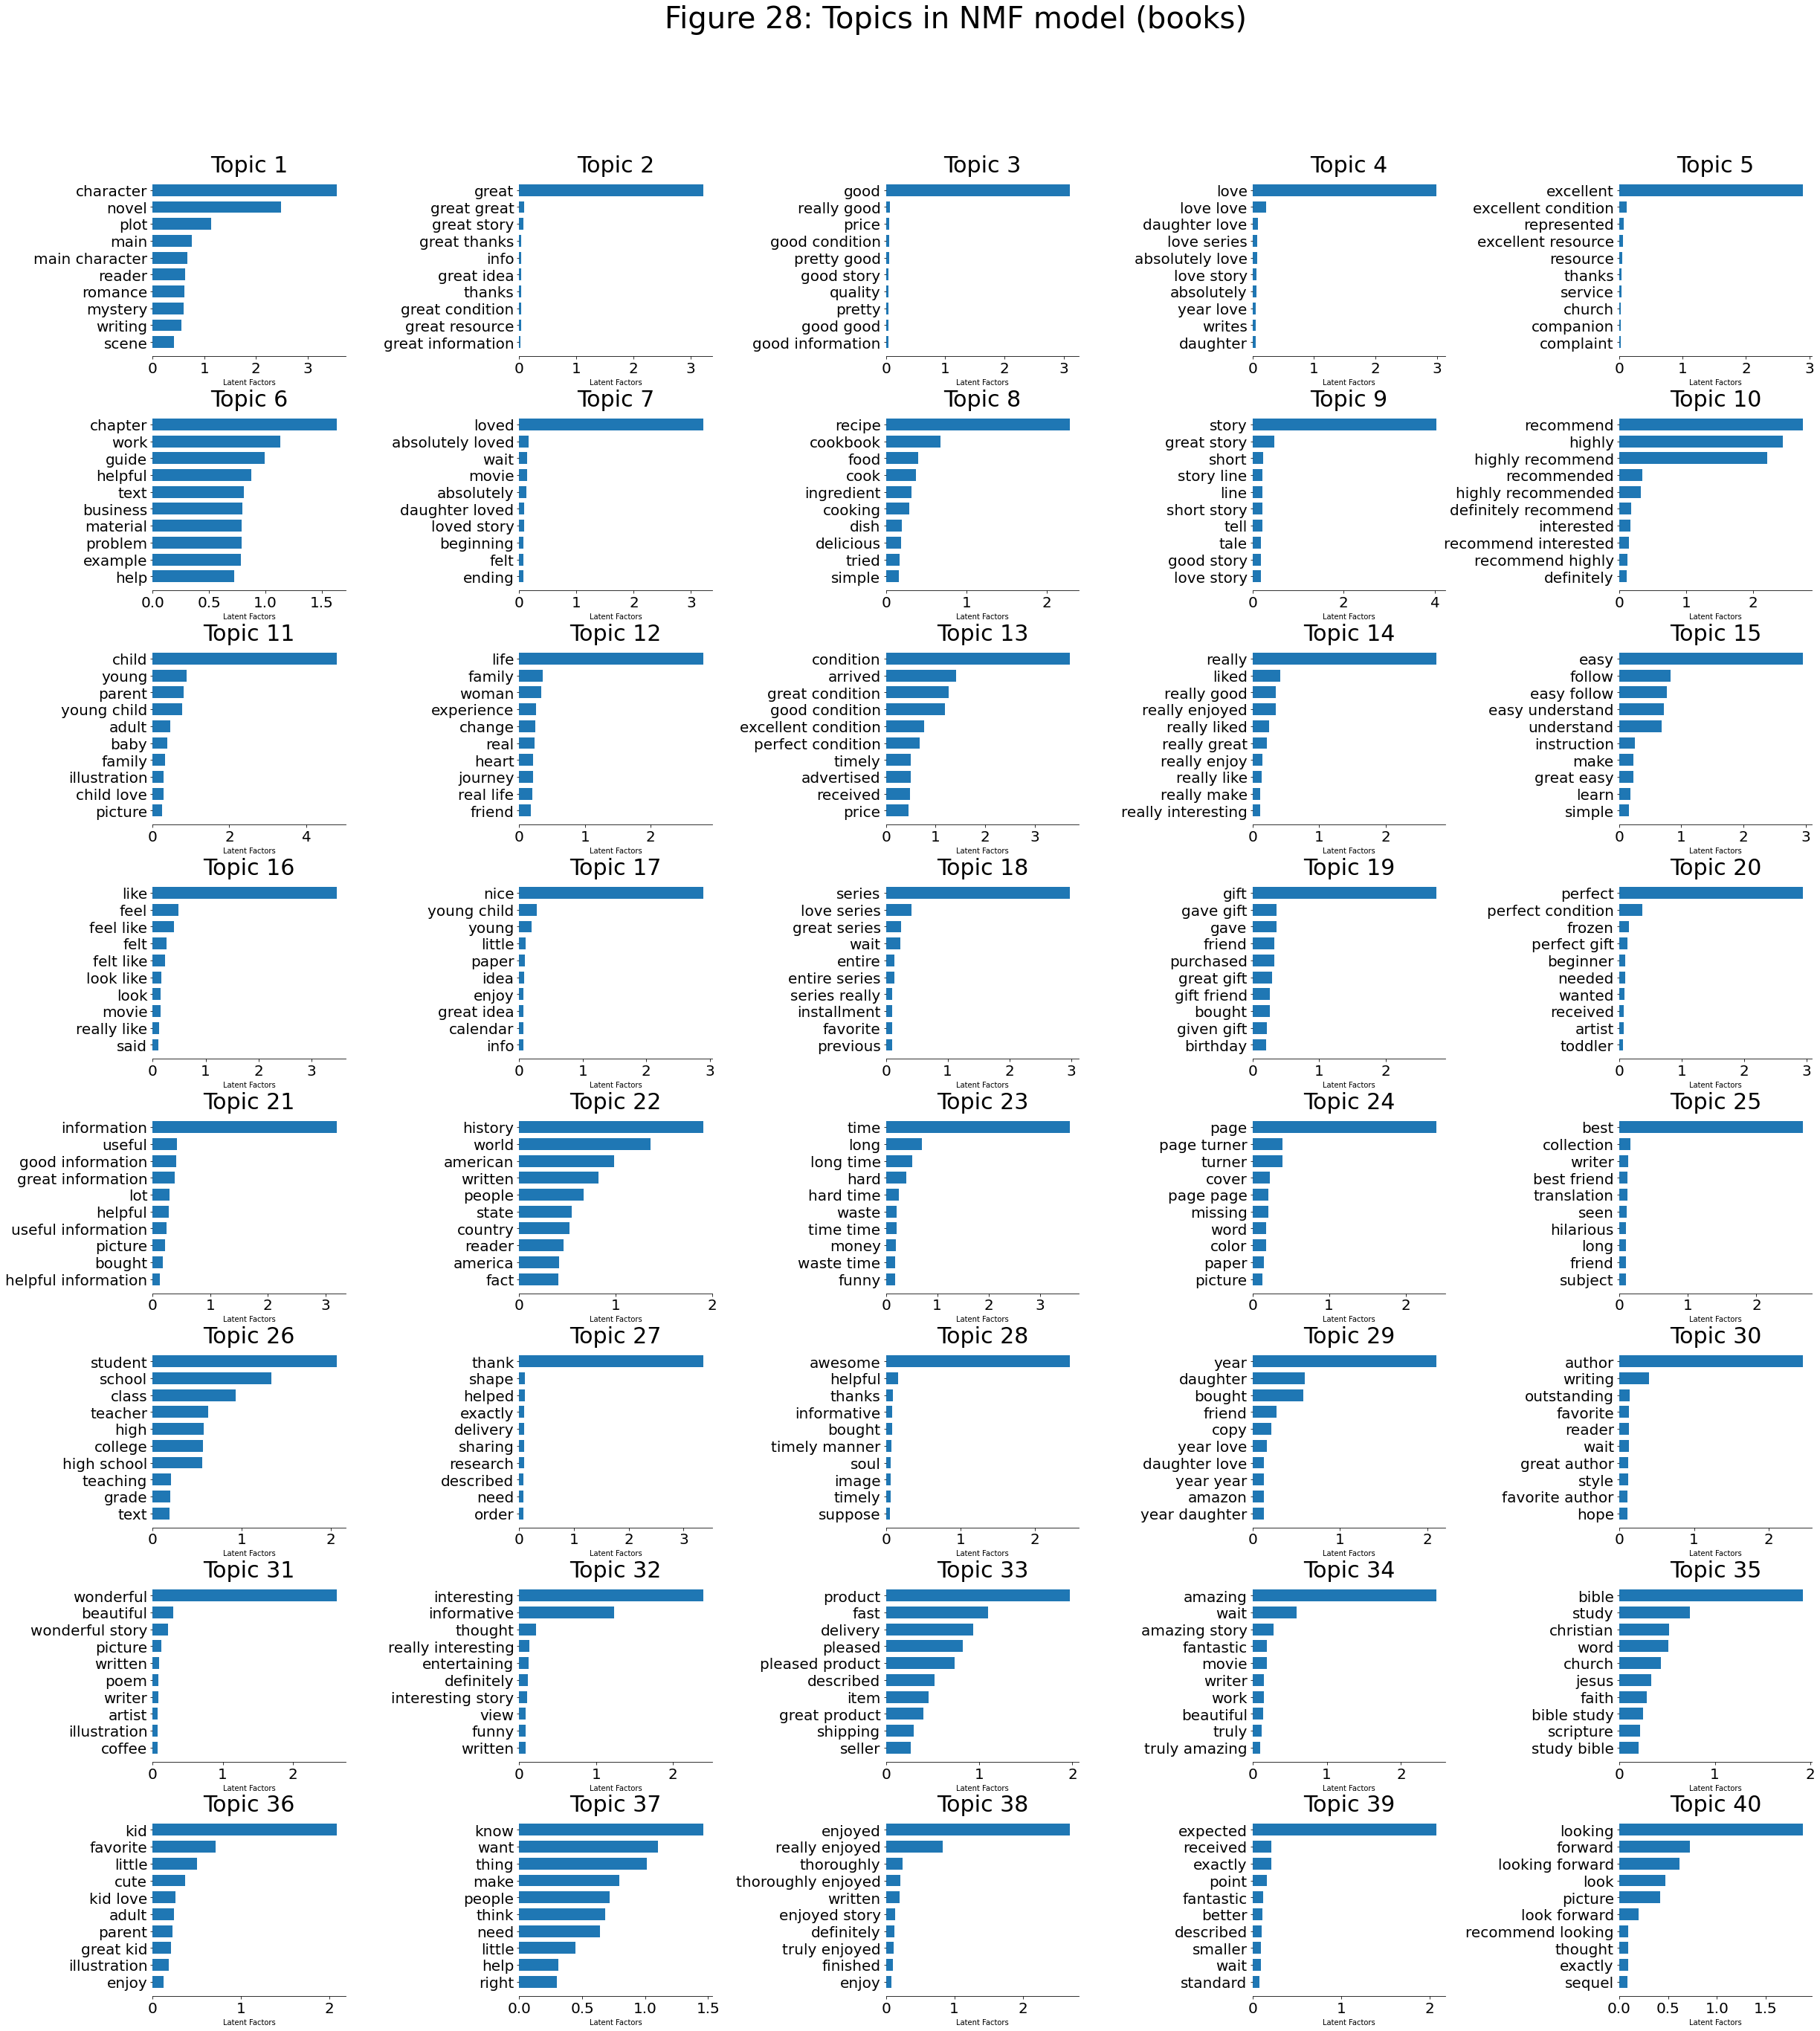

In [49]:
run_nmf(df_books['docs'],
        title='Figure 28: Topics in NMF model (books)')

# Summary of Results and Conclusion

The topics that were uncovered through TDIDF and NMF were able to show some differences with respect to the star ratings, where the more negative topics and descriptive words surfaced at the 3-star rating mark. It is also interesting that despite the fact that genre was not part of the dataframe, some genre-related topics still surfaced after analyzing the latent factors using NMF. Meanwhile, the reviews from verified purchases and vine purchases seemed to be more on the positive side overall, and books and ebooks also seemed to the on the positive side as well. 

**Table 6: Summary of the Latent Factors (Topics) based on NMF**

| Rating/Review   Type | Summary of topics   based on NMF                                                                                                                                                                                                                                |
|----------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 5-Star               | well-written book   series, excellent condition, page turners, twists and turns, good condition   for gifts, easy to understand, favorite author, children's books                                                                                              |
| 4-star               | good storyline and   charcters, enjoyable and interesting, quick and easy, part of a series, made   to a movie, page-turners, plot twists and turns, thought-provking, slow and   predictable                                                                   |
| 3-star               | good storyline and   character development, cookbooks, page-turners, disappointing and boring,   predictable, kindle vs paperback, basic, beginner and simple, disappointing   ending, slow start                                                               |
| 2-star               | boring,   disappointing, hard to follow, outdated information, waste of money and time,   weak plot and ending, slow moving, poorly written, predictable, writing   style, character and storyline, cookbook, books about women/feminism                                                    |
| 1-star               | boring and   predictable, waste of money, weak character plot or ending, poorly written,   disappointing, silly, predictable, unrealistic, difficult to   follow/understand, wrong order, missing pages, access code issues, deleted   from Kindle, wrong answers, cookbooks, restaurant guides, books about women/abuse |
| Verified purchases   | great, interesting   storylines, part of a book series, author's writing style, informative,   mystery, page-turners, recipes, fast delivery                                                                                                                    |
| Vine                 | great writing style,   storyline and characters, part of a book series, easy to understand, favorite   author, children's books, page turners, informative, twists and turns, good   condition for gits, fast delivery                                          |
| Ebooks               | great story and   character development, writing style, worth the time, short story, favorite   author, twists and turns, turned into a movie, fast-paced, good ending                                                                                                        |
| Books                | character development   and storyline, business book, cookbooks, easy to follow, good to give as   gift, good condition, part of a series, history book, informative, favorite   author, religious books, coffee table books, fast delivery                      |

The results show very interesting insights that can be useful for customers (who could be informed on what a 5-star, 4-star, etc. rating actually means), Amazon (who can improve their service), and the publishers/book authors (what do readers like/dislike about their books). These are the topics and themes that authors and merchants should look out for. The main difference of books and ebooks based from the results is that books are more suitable for gifts since it is tangible compared to ebooks and that ebooks are shorter and fast-paced compared to books. For a book/ebook to be rated as a 5-star, the book/ebook should be in good condition and should have good content as well. On the other hand, for it to be rated poorly, it means that the book/ebook is boring, hard to understand, predictable, and it is in poor condition. All these findings could lead to better products and services for customers and merchants in the long run.

The results are also consistent with the initial findings in the exploratory data analysis. Five star ratings revolve around the story and other positive attributes of a good book. One-star ratings are mostly negative attributes which is consistent with the insight from EDA section [3.4.3](#helpful) with regards to the high average helpful votes for 1-star ratings. For mid-range star ratings, it was observed that there are both positive and negative attributes which is consistent with the insight from EDA section [3.4.4](#length) with regards to the length of the review of mid-rating reviews.

# Recommendations



The  study is currently limited by the available data and limited knowledge and computing power to work on more data. Hence, the avenues for further research are as follows:

1. Discover if there is a 'time' dimension in the books reviews. Does the meaning of the star ratings change through time? It may be noted that this current study is time agnostic, but it would be interesting to see if customer preferences have changed across the years.

2. Verify the genres that were unearthed using clustering methods or more advanced NLP techniques.

3. Study how genres affect the reviews of a book/ebook. Which genres are more popular to the general reader?

4. Confirm if these observed themes and topics for star ratings are consistent with other online selling platforms that sell books/ebooks.

# References

<a id='Amazon'>Amazon.com. (n.d.)</a>. Amazon.com - Amazon Vine Program. Retrieved August 22, 2021, from https://www.amazon.com/gp/vine/help

<a id='Beri'>Beri, A.(2021, January 27).</a> Stemming vs Lemmatization - Towards Data Science. Medium. https://towardsdatascience.com/stemming-vs-lemmatization-2daddabcb221

<a id='Boost'>Boost Labs. (2020, November 3)</a>. What are Word Clouds? The Value of Simple Visualizations. https://boostlabs.com/blog/what-are-word-clouds-value-simple-visualizations/

<a id='Navlani'>Python LSI/LSA (Latent Semantic Indexing/Analysis).</a> (2018). DataCamp Community. https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

<a id='Vu'>(Tutorial) Generate Word Clouds in Python.</a> (2019). DataCamp Community. https://www.datacamp.com/community/tutorials/wordcloud-python

<a id='ED'>Easter, M., & Dave, P. (2017, November 20)</a>. Remember when Amazon only sold books? Los Angeles Times. https://www.latimes.com/business/la-fi-amazon-history-20170618-htmlstory.html

<a id='Galera'>Galera, R. (2021, May 11)</a>. 7 Ways to Drive E-Commerce Sales with Consumer Reviews. Word-of-Mouth and Referral Marketing Blog. https://www.referralcandy.com/blog/ecommerce-sales-customer-reviews/

<a id='Gopakumar'>Peter, R., Gopakumar, S. et. al.</a> Evaluation of SVD and NMF methods for Latent Semantic Analysis. Available online at https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.726.9069&rep=rep1&type=pdf

<a id='Gorman'>Gorman, L. (2004, May)</a>. The Effect of Word of Mouth on Sales: Online Book Reviews. NBER. https://www.nber.org/digest/may04/effect-word-mouth-sales-online-book-reviews

<a id='Guevarra'>Guevarra, L. M. (2021, June 1)</a>. E-commerce: The Past, Present, and Future. Spiralytics Inc. https://www.spiralytics.com/blog/past-present-future-ecommerce/

<a id='Zhang'>Kem Z.K. Zhang, Haiqin Xu, Sesia Zhao, Yugang Yu, (2018)</a> "Online reviews and impulse buying behavior: the role of browsing and impulsiveness", Internet Research, Vol. 28 Issue: 3, pp.522-543, https://doi.org/10.1108/IntR-12-2016-0377

<a id="Portilla">Portilla, J. (2019).</a> Natural Language Processing with Python Online Course. Available online at www.udemy.com

<a id='nmf'>Scikit-Learn. (2020). </a>Topic extraction with Non-negative Matrix Factorization and Latent Dirichlet Allocation — scikit-learn 0.24.2 documentation. Scikit Learn. https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py

<a id='Sutherland'>Sutherland, P., Datta, A., Mehta, P., & Vendasta Marketing. (2020, September 18)</a>. Sentiment Analysis turns Customer Reviews into Insights. Vendasta Blog. https://www.vendasta.com/blog/sentiment-analysis-turns-reviews-into-insights/

<a id='Thiel'>Thiel, A. (2002)</a>. The Impact of E-commerce on the Bookselling Industry. Beltz Verlag.

<a id='Truitt'>Truitt, L. (2021, January 14).</a>The Inside Scoop on Ecommerce Reviews: Why They Matter and How to Make the Most of Them. The BigCommerce Blog. https://www.bigcommerce.com/blog/online-reviews/#who-is-reading-online-reviews



<a id=''></a>
 















